In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/LG_Aimers4/train.csv')
test = pd.read_csv('/content/drive/MyDrive/LG_Aimers4/submission.csv')
train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


# 컬럼별 전처리 전략

In [ ]:
# 중복 행을 제거하고 각 중복 그룹에서 첫 번째 행만 남김
train = train.drop_duplicates()
train = train.reset_index(drop = True)
train

,bant_submit,business_unit,com_reg_ver_win_rate,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,...,business_subarea,lead_owner,is_converted,Field,City,Country,lead_desc_length_category,Field_1,City_1,Country_1
0,1.0,AS,0.066667,End-Customer,Enterprise,1,0.0,0.0,0.0,purchasing,...,Engineering,0,True,,Quezon City,Philippines,Medium,,Quezon City,Philippines
1,1.0,AS,0.066667,End-Customer,Enterprise,1,0.0,0.0,0.0,media and communication,...,Advertising,1,True,,PH-00,Philippines,Medium,,PH-00,Philippines
2,1.0,AS,0.088889,End-Customer,Enterprise,1,0.0,0.0,0.0,engineering,...,Construction,2,True,,Kolkata,India,Short,,Kolkata,India
3,1.0,AS,0.088889,End-Customer,Enterprise,1,0.0,0.0,0.0,entrepreneurship,...,IT/Software,3,True,,Bhubaneswar,India,Short,,Bhubaneswar,India
4,1.0,AS,0.088889,Specifier/ Influencer,Enterprise,1,0.0,0.0,0.0,consulting,...,NaN,4,True,,Hyderabad,India,Medium,,Hyderabad,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48117,1.0,AS,NaN,NaN,Enterprise,1,0.0,0.0,0.0,healthcare services,...,NaN,774,False,,Baturaja,Indonesia,Long,,Baturaja,Indonesia
48118,1.0,AS,NaN,End-Customer,SMB,1,0.0,0.0,0.0,engineering,...,Others,694,False,,Sląskie,Poland,Long,,Sląskie,Poland
48119,0.5,AS,0.040000,Specifier/ Influencer,Enterprise,1,0.0,0.0,0.0,entrepreneurship,...,NaN,39,False,,Bogotá DC,Colombia,Medium,,Bogotá DC,Colombia
48120,0.5,AS,0.040000,Specifier/ Influencer,Enterprise,1,0.0,0.0,0.0,engineering,...,NaN,125,False,,Pisco,Peru,Short,,Pisco,Peru


In [ ]:
train.columns

Index(['bant_submit', 'business_unit', 'com_reg_ver_win_rate', 'customer_type',
       'enterprise', 'historical_existing_cnt', 'id_strategic_ver',
       'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
       'lead_desc_length', 'inquiry_type', 'product_category',
       'product_subcategory', 'product_modelname', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted', 'Field', 'City',
       'Country', 'lead_desc_length_category', 'Field_1', 'City_1',
       'Country_1'],
      dtype='object')

## bant_submit
### MQL 구성 요소들 중  
### [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율

In [ ]:
train_bant_submit = train[['bant_submit']].copy()
test_bant_submit = test[['bant_submit']].copy()
train_bant_submit['bant_submit'].unique(), test_bant_submit['bant_submit'].unique()#0 ~ 1까지 0.25씩 있음
# 1은 4개 다 작성된거고 0은 아애 작성 안된걸로 보임

(array([1. , 0.5, 0. ]), array([0. , 0.5, 1. ]))

In [ ]:
train_bant_submit['bant_submit'].value_counts(), test_bant_submit['bant_submit'].value_counts()

(0.5    32580
 1.0    15064
 0.0      478
 Name: bant_submit, dtype: int64,
 0.5    2734
 1.0    2070
 0.0     467
 Name: bant_submit, dtype: int64)

In [ ]:
conversion_summary = train.groupby('bant_submit')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('bant_submit')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count
bant_submit,,,,,
0.5,32580,0.086986,0.913014,2834,29746
1.0,15064,0.089153,0.910847,1343,13721
0.0,478,0.158996,0.841004,76,402


## customer_country

In [ ]:
train_customer_country = train[['customer_country']].copy()
test_customer_country = test[['customer_country']].copy()
train_customer_country['customer_country'].unique(), test_customer_country['customer_country'].unique() #전처리 필요

## business_unit

In [ ]:
train_business_unit = train[['business_unit','is_converted']].copy()
test_business_unit = test[['business_unit']].copy()
train_business_unit['business_unit'].unique(), test_business_unit['business_unit'].unique() #train 에는 5개 unique가 있는데 test에는 3개 unique만 존재

(array(['AS', 'ID', 'IT'], dtype=object),
 array(['ID', 'IT', 'AS'], dtype=object))

In [ ]:
# test에 존재하는 business_unit
print(train_business_unit[train_business_unit['business_unit'] == 'AS']['is_converted'].value_counts())
print(train_business_unit[train_business_unit['business_unit'] == 'ID']['is_converted'].value_counts())
print(train_business_unit[train_business_unit['business_unit'] == 'IT']['is_converted'].value_counts())

False    19002
True      1309
Name: is_converted, dtype: int64
False    20804
True      2399
Name: is_converted, dtype: int64
False    4063
True      545
Name: is_converted, dtype: int64


In [ ]:
# test에 존재하지 않는 business_unit unique
print(train_business_unit[train_business_unit['business_unit'] == 'Solution']['is_converted'].value_counts())
print(train_business_unit[train_business_unit['business_unit'] == 'CM']['is_converted'].value_counts())

Series([], Name: is_converted, dtype: int64)
Series([], Name: is_converted, dtype: int64)


In [ ]:
conversion_summary = train.groupby('business_unit')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('business_unit')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count
business_unit,,,,,
ID,23203,0.103392,0.896608,2399,20804
AS,20311,0.064448,0.935552,1309,19002
IT,4608,0.118273,0.881727,545,4063


## com_reg_ver_win_rate
### Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산
### 기회비용으로 보임?

In [ ]:
train_com_reg_ver_win_rate = train[['com_reg_ver_win_rate','is_converted']].copy()
test_com_reg_ver_win_rate = test[['com_reg_ver_win_rate']].copy()
train_com_reg_ver_win_rate['com_reg_ver_win_rate'].nunique(), test_com_reg_ver_win_rate['com_reg_ver_win_rate'].nunique()

(80, 77)

In [ ]:
train_com_reg_ver_win_rate['com_reg_ver_win_rate'].describe(), test_com_reg_ver_win_rate['com_reg_ver_win_rate'].describe()

(count    12947.000000
 mean         0.084091
 std          0.138601
 min          0.003788
 25%          0.019900
 50%          0.049180
 75%          0.074949
 max          1.000000
 Name: com_reg_ver_win_rate, dtype: float64,
 count    1788.000000
 mean        0.102336
 std         0.151790
 min         0.003788
 25%         0.032787
 50%         0.053892
 75%         0.075000
 max         1.000000
 Name: com_reg_ver_win_rate, dtype: float64)

In [ ]:
train_com_reg_ver_win_rate[train_com_reg_ver_win_rate['com_reg_ver_win_rate'] >= 0.74949]['is_converted'].value_counts()

False    10
True      9
Name: is_converted, dtype: int64

In [ ]:
train_com_reg_ver_win_rate[train_com_reg_ver_win_rate['com_reg_ver_win_rate'] >= 0.102336]['is_converted'].value_counts()

False    1352
True      465
Name: is_converted, dtype: int64

In [ ]:
train_com_reg_ver_win_rate[train_com_reg_ver_win_rate['com_reg_ver_win_rate'] >= 0.053892]['is_converted'].value_counts()

False    5318
True      798
Name: is_converted, dtype: int64

In [ ]:
train_com_reg_ver_win_rate[train_com_reg_ver_win_rate['com_reg_ver_win_rate'] <= 0.053892]['is_converted'].value_counts()

False    6598
True      233
Name: is_converted, dtype: int64

In [ ]:
train_com_reg_ver_win_rate[train_com_reg_ver_win_rate['com_reg_ver_win_rate'] <= 0.032787]['is_converted'].value_counts()

False    4796
True      114
Name: is_converted, dtype: int64

In [ ]:
#com_reg_ver_win_rate가 커질수록 1일 확률도 커짐

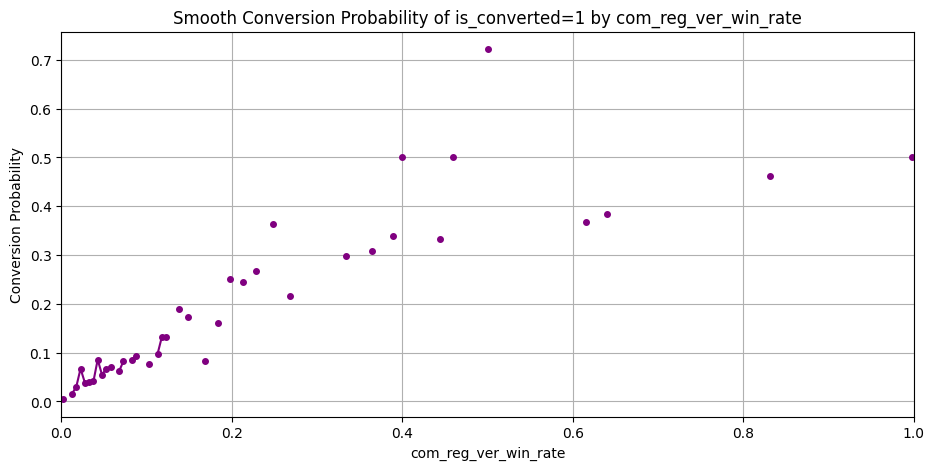

In [ ]:
bins_fine = pd.cut(train['com_reg_ver_win_rate'], bins=[i/200.0 for i in range(201)], include_lowest=True, right=True)
# 각 구간별로 is_converted가 1인 비율 계산
conversion_rate_fine = train.groupby(bins_fine)['is_converted'].mean()
# com_reg_ver_win_rate의 범위를 0부터 1까지 세밀하게 나누고, 각 구간의 중심값을 x축 데이터로 사용
bins = np.linspace(0, 1, 200)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# 각 구간별 is_converted가 1인 비율(변환 확률) 계산
conversion_rate_by_bin = train.groupby(pd.cut(train['com_reg_ver_win_rate'], bins=bins, include_lowest=True))['is_converted'].mean()
# 중심값을 사용하여 그래프 그리기
plt.figure(figsize=(11, 5))
plt.plot(bin_centers, conversion_rate_by_bin.values, linestyle='-', marker='o', color='purple', markersize=4)
plt.title('Smooth Conversion Probability of is_converted=1 by com_reg_ver_win_rate')
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Conversion Probability')
plt.xlim([0, 1])  # x축의 범위를 명확하게 0부터 1까지로 설정
plt.grid(True)
plt.show()

## customer_idx

In [ ]:
train_customer_idx = train[['customer_idx','is_converted']].copy()
test_customer_idx = test[['customer_idx']].copy()
len(train_customer_idx), train_customer_idx['customer_idx'].nunique(), len(test_customer_idx), test_customer_idx['customer_idx'].nunique() #겹치는

In [ ]:
train_customer_idx['customer_idx'].value_counts()

47466    6853
25096    2404
37680     326
21321     154
18030     122
         ... 
23953       1
13482       1
28749       1
3943        1
30268       1
Name: customer_idx, Length: 35112, dtype: int64

In [ ]:
print(train_customer_idx[train_customer_idx['customer_idx'] == 47466]['is_converted'].value_counts())
print(train_customer_idx[train_customer_idx['customer_idx'] == 25096]['is_converted'].value_counts())
print(train_customer_idx[train_customer_idx['customer_idx'] == 37680]['is_converted'].value_counts())

False    6792
True       61
Name: is_converted, dtype: int64
True    2404
Name: is_converted, dtype: int64
False    322
True       4
Name: is_converted, dtype: int64


In [ ]:
# Extracting the unique customer_idx values from both dataframes
unique_customer_idx_submission = set(test['customer_idx'].unique())
unique_customer_idx_train = set(train['customer_idx'].unique())

# Finding common unique values in 'customer_idx' feature
common_customer_idx = unique_customer_idx_submission.intersection(unique_customer_idx_train)

# The number of common unique values
len(common_customer_idx)#, common_customer_idx

In [ ]:
# Filtering the train_df for only those customer_idx values that are common between the two dataframes
common_customer_idx_df = train[train['customer_idx'].isin(common_customer_idx)]

# Calculating the conversion (is_converted) ratio for each unique customer_idx
conversion_ratio = common_customer_idx_df.groupby('customer_idx')['is_converted'].value_counts(normalize=True).unstack(fill_value=0)

# Displaying the conversion ratio
conversion_ratio

conversion_count = common_customer_idx_df.groupby('customer_idx')['is_converted'].value_counts().unstack(fill_value=0)

# Displaying the conversion count along with the ratio
conversion_count_with_ratio = conversion_count.join(conversion_ratio, rsuffix='_ratio')
conversion_count_with_ratio['sum'] = conversion_count_with_ratio['False'] + conversion_count_with_ratio['True']
conversion_count_with_ratio = conversion_count_with_ratio.sort_values('sum')
conversion_count_with_ratio = conversion_count_with_ratio[conversion_count_with_ratio['sum'] > 30]
conversion_count_with_ratio

In [ ]:
# 겹치는게 거의 없는데 이거 쓰는게 맞나? 안쓰는게 좋아보임

## customer_type

In [ ]:
train_customer_type = train[['customer_type','is_converted']].copy()
test_customer_type = test[['customer_type']].copy()
train_customer_type['customer_type'].unique(), test_customer_type['customer_type'].unique() #겹치는게 test에 거의 없음

(array(['End-Customer', 'Specifier/ Influencer', 'Service Partner',
        'Channel Partner', nan, 'Solution Eco-Partner'], dtype=object),
 array(['End-Customer', 'Specifier/ Influencer', nan, 'Service Partner',
        'Channel Partner', 'Solution Eco-Partner', 'Developer'],
       dtype=object))

In [ ]:
train_customer_type['customer_type'].nunique(), test_customer_type['customer_type'].nunique()

(5, 6)

In [ ]:
# test에 존재하는 customer_type unique
print(train_customer_type[train_customer_type['customer_type'] == 'End Customer']['is_converted'].value_counts())
print(train_customer_type[train_customer_type['customer_type'] == 'Specifier/ Influencer']['is_converted'].value_counts())
print(train_customer_type[train_customer_type['customer_type'] == 'Service Partner']['is_converted'].value_counts())
print(train_customer_type[train_customer_type['customer_type'] == 'Channel Partner']['is_converted'].value_counts())
print(train_customer_type[train_customer_type['customer_type'] == 'Solution Eco-Partner']['is_converted'].value_counts())
print(train_customer_type[train_customer_type['customer_type'] == 'Developer']['is_converted'].value_counts())
print(train_customer_type[train_customer_type['customer_type'] == 'End-Customer']['is_converted'].value_counts())

Series([], Name: is_converted, dtype: int64)
False    1978
True      174
Name: is_converted, dtype: int64
False    255
True      37
Name: is_converted, dtype: int64
False    1075
True      125
Name: is_converted, dtype: int64
False    84
True     28
Name: is_converted, dtype: int64
Series([], Name: is_converted, dtype: int64)
False    7627
True     1113
Name: is_converted, dtype: int64


In [ ]:
# Extracting the unique 'customer_type' values from submission_origin and checking their presence in train
unique_customer_type_submission = set(test['customer_type'].unique())
unique_customer_type_train = set(train['customer_type'].unique())

# Identifying which 'customer_type' values from submission_origin exist in train
customer_type_existence = {customer_type: customer_type in unique_customer_type_train for customer_type in unique_customer_type_submission}

# Calculating the conversion summary for 'customer_type' in train data
conversion_summary = train.groupby('customer_type')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('customer_type')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 0]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(customer_type_existence)
customer_type_counts_submission = test['customer_type'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(customer_type_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
customer_type,,,,,,,
End-Customer,8740,0.127346,0.872654,1113,7627,True,2454
Specifier/ Influencer,2152,0.080855,0.919145,174,1978,True,788
Channel Partner,1200,0.104167,0.895833,125,1075,True,327
Service Partner,292,0.126712,0.873288,37,255,True,98
Solution Eco-Partner,112,0.250000,0.750000,28,84,True,146


In [ ]:
# test에 존재하는 customer_type unique
print(len(train_customer_type[train_customer_type['customer_type'] == 'End Customer']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'Specifier/ Influencer']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'Service Partner']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'Channel Partner']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'Solution Eco-Partner']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'Developer']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'End Customer']))
print(len(train_customer_type[train_customer_type['customer_type'] == 'End-Customer']))

0
2152
292
1200
112
0
0
8740


In [ ]:
# test에 존재하는 customer_type len
print(len(test_customer_type[test_customer_type['customer_type'] == 'End Customer']))
print(len(test_customer_type[test_customer_type['customer_type'] == 'Specifier/ Influencer']))
print(len(test_customer_type[test_customer_type['customer_type'] == 'Service Partner']))
print(len(test_customer_type[test_customer_type['customer_type'] == 'Channel Partner']))
print(len(test_customer_type[test_customer_type['customer_type'] == 'Solution Eco-Partner']))
print(len(test_customer_type[test_customer_type['customer_type'] == 'Developer']))
print(len(test_customer_type[test_customer_type['customer_type'] == 'End-Customer']))

0
788
98
327
146
1
2454


In [ ]:
test['customer_type'].value_counts()

End-Customer             2454
Specifier/ Influencer     788
Channel Partner           327
Solution Eco-Partner      146
Service Partner            98
Developer                   1
Name: customer_type, dtype: int64

## enterprise
### Global 기업인지, Small/Medium 규모의 기업인지

In [ ]:
train_enterprise = train[['enterprise','is_converted']].copy()
test_enterprise = test[['enterprise']].copy()
train_enterprise['enterprise'].unique(), test_enterprise['enterprise'].unique()

(array(['Enterprise', 'SMB'], dtype=object),
 array(['Enterprise', 'SMB'], dtype=object))

In [ ]:
conversion_summary = train.groupby('enterprise')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('enterprise')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count
enterprise,,,,,
Enterprise,30802,0.062756,0.937244,1933,28869
SMB,17320,0.133949,0.866051,2320,15000


In [ ]:
print(train_enterprise[train_enterprise['enterprise'] == 'Enterprise']['is_converted'].value_counts())
print(train_enterprise[train_enterprise['enterprise'] == 'SMB']['is_converted'].value_counts())

False    28869
True      1933
Name: is_converted, dtype: int64
False    15000
True      2320
Name: is_converted, dtype: int64


## historical_existing_cnt
### 이전에 Converted(영업 전환) 되었던 횟수

In [ ]:
train_historical_existing_cnt = train[['historical_existing_cnt','is_converted']].copy()
test_historical_existing_cnt = test[['historical_existing_cnt']].copy()
train_historical_existing_cnt['historical_existing_cnt'].unique(), test_historical_existing_cnt['historical_existing_cnt'].unique() #겹치는게 test에 거의 없음

(array([1, 0]), array([1, 0]))

In [ ]:
conversion_summary = train.groupby('historical_existing_cnt')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('historical_existing_cnt')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count
historical_existing_cnt,,,,,
4.0,2840,0.003873,0.996127,11,2829
0.0,1815,0.157025,0.842975,285,1530
19.0,1422,0.016174,0.983826,23,1399
1.0,1412,0.056657,0.943343,80,1332
16.0,1007,0.001986,0.998014,2,1005
115.0,744,0.004032,0.995968,3,741
3.0,676,0.032544,0.967456,22,654
2.0,443,0.081264,0.918736,36,407
105.0,283,0.003534,0.996466,1,282


In [ ]:
# historical_existing_cnt 0 즉 신규 고객이 많이 전환되는듯? / 0 또는 1로?

## id_strategic_ver
### (도메인 지식) 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여

In [ ]:
# NaN 94.19214489, 88.74976285

In [ ]:
train_id_strategic_ver = train[['id_strategic_ver','is_converted']].copy()
test_id_strategic_ver = test[['id_strategic_ver']].copy()
train_id_strategic_ver['id_strategic_ver'].unique(), test_id_strategic_ver['id_strategic_ver'].unique() #겹치는게 test에 거의 없음

(array([0., 1.]), array([0., 1.]))

In [ ]:
train[train['id_strategic_ver'] == 1]['business_unit'].unique()

array(['ID'], dtype=object)

In [ ]:
train[train['business_unit'] == 'ID']['id_strategic_ver'].unique()

array([1., 0.])

In [ ]:
test[test['id_strategic_ver'] == 1]['business_unit'].unique()

array(['ID'], dtype=object)

In [ ]:
test[test['business_unit'] == 'ID']['id_strategic_ver'].unique()

array([0., 1.])

In [ ]:
conversion_summary = train.groupby('id_strategic_ver')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('id_strategic_ver')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count
id_strategic_ver,,,,,
0.0,45041,0.088519,0.911481,3987,41054
1.0,3081,0.086336,0.913664,266,2815


## it_strategic_ver
### (도메인 지식) 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여

In [ ]:
# NaN 98.10958026, 98.9944982

In [ ]:
train_it_strategic_ver = train[['it_strategic_ver','is_converted']].copy()
test_it_strategic_ver = test[['it_strategic_ver']].copy()
train_it_strategic_ver['it_strategic_ver'].unique(), test_it_strategic_ver['it_strategic_ver'].unique() #겹치는게 test에 거의 없음

(array([0., 1.]), array([0., 1.]))

In [ ]:
train[train['it_strategic_ver'] == 1]['business_unit'].unique()

array(['IT'], dtype=object)

In [ ]:
train[train['business_unit'] == 'IT']['it_strategic_ver'].unique()

array([1., 0.])

In [ ]:
test[test['it_strategic_ver'] == 1]['business_unit'].unique()

array(['IT'], dtype=object)

In [ ]:
test[test['business_unit'] == 'IT']['it_strategic_ver'].unique()

array([0., 1.])

In [ ]:
test[test['business_unit'] == 'IT'].sort_values('it_strategic_ver').iloc[:,2:]

,business_unit,com_reg_ver_win_rate,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,...,business_subarea,lead_owner,is_converted,Field,City,Country,lead_desc_length_category,Field_1,City_1,Country_1
1,IT,NaN,End-Customer,SMB,1,0.0,0.0,0.0,others,23,...,Others,437,NaN,400 N State Of Franklin Rd Cloud IT,Johnson City,United States,Short,400 N State Of Franklin Rd Cloud IT,Johnson City,United States
3651,IT,0.230769,End-Customer,SMB,1,0.0,0.0,0.0,engineering,481,...,Clinic,838,NaN,,Werdau,Germany,Long,,Werdau,Germany
3645,IT,NaN,NaN,SMB,0,0.0,0.0,0.0,others,140,...,NaN,375,NaN,,,United States,Medium,,,United States
3636,IT,NaN,End-Customer,SMB,1,0.0,0.0,0.0,others,20,...,Others,439,NaN,3801 Latona Ave Ne Cloud IT,Seattle,United States,Short,3801 Latona Ave Ne Cloud IT,Seattle,United States
3634,IT,NaN,NaN,SMB,1,0.0,0.0,0.0,others,140,...,NaN,438,NaN,,,United States,Medium,,,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,IT,NaN,End-Customer,SMB,1,0.0,1.0,1.0,others,129,...,Construction,431,NaN,,BLACKPOOL,United Kingdom,Medium,,BLACKPOOL,United Kingdom
2324,IT,0.043478,NaN,SMB,1,0.0,1.0,1.0,others,274,...,Others,374,NaN,Cloud IT,,United States,Long,Cloud IT,,United States
4576,IT,NaN,Channel Partner,SMB,1,0.0,1.0,1.0,product management,201,...,Others,425,NaN,,dubai,U.A.E,Long,,dubai,U.A.E
873,IT,0.043478,End-Customer,Enterprise,1,0.0,1.0,1.0,others,71,...,IT/Software,435,NaN,Cloud IT,New York,United States,Medium,Cloud IT,New York,United States


## idit_strategic_ver
### 	Id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현

In [ ]:
# NaN 92.30172516, 87.74426105

In [ ]:
train_idit_strategic_ver = train[['idit_strategic_ver','is_converted']].copy()
test_idit_strategic_ver = test[['idit_strategic_ver']].copy()
train_idit_strategic_ver['idit_strategic_ver'].unique(), test_idit_strategic_ver['idit_strategic_ver'].unique() #겹치는게 test에 거의 없음

(array([0., 1.]), array([0., 1.]))

In [ ]:
train[train['idit_strategic_ver'] == 1]['business_unit'].unique()

array(['ID', 'IT'], dtype=object)

## customer_job

In [ ]:
train_customer_job = train[['customer_job','is_converted']].copy()
test_customer_job = test[['customer_job']].copy()
train_customer_job['customer_job'].unique(), test_customer_job['customer_job'].unique() #겹치는게 test에 거의 없음

(array(['purchasing', 'media and communication', 'engineering',
        'entrepreneurship', 'consulting', 'program and project management',
        'sales', 'other', 'operations', 'others', 'administrative',
        'business development', 'information technology', 'accounting',
        'education', 'healthcare services', 'human resources', 'support',
        'finance', 'marketing', 'legal', 'arts and design', 'real estate',
        'military and protective services', 'research',
        'product management', 'community and social services',
        'radiology professional', 'graphic/color art',
        'medical imaging specialist', 'medical solution provider',
        'manager', 'owner', '3d/vfx art', 'film production',
        'surgery professional', 'clinical specialist'], dtype=object),
 array(['consulting', 'others', 'information technology', 'sales',
        'engineering', 'marketing', 'purchasing', 'operations', 'support',
        'finance', 'business development', 'administrati

In [ ]:
train_customer_job['customer_job'].nunique(), test_customer_job['customer_job'].nunique() #겹치는게 test에 거의 없음

(37, 34)

In [ ]:
# Extracting the unique 'customer_job' values from submission_origin and checking their presence in train
unique_customer_job_submission = set(test['customer_job'].unique())
unique_customer_job_train = set(train['customer_job'].unique())

# Identifying which 'customer_job' values from submission_origin exist in train
customer_job_existence = {customer_job: customer_job in unique_customer_job_train for customer_job in unique_customer_job_submission}

# Calculating the conversion summary for 'customer_job' in train data
conversion_summary = train.groupby('customer_job')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('customer_job')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(customer_job_existence)
customer_job_counts_submission = test['customer_job'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(customer_job_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
customer_job,,,,,,,
others,17018,0.071042,0.928958,1209,15809,True,1935.0
engineering,5465,0.095700,0.904300,523,4942,True,728.0
other,3315,0.072700,0.927300,241,3074,True,24.0
administrative,2856,0.105042,0.894958,300,2556,True,307.0
education,2116,0.089319,0.910681,189,1927,True,408.0
sales,1821,0.070840,0.929160,129,1692,True,162.0
information technology,1728,0.177662,0.822338,307,1421,True,231.0
purchasing,1686,0.152432,0.847568,257,1429,True,180.0
operations,1634,0.075275,0.924725,123,1511,True,195.0


In [ ]:
# Calculating the count of samples for each unique 'customer_job' value in submission_origin data
customer_job_counts_submission = test['customer_job'].value_counts()
customer_job_counts_submission

others                              1935
engineering                          728
education                            408
administrative                       307
information technology               231
operations                           195
purchasing                           180
consulting                           166
business development                 164
sales                                162
entrepreneurship                     119
arts and design                      102
program and project management        96
marketing                             94
media and communication               48
support                               47
healthcare services                   44
finance                               42
product management                    36
accounting                            34
real estate                           26
other                                 24
community and social services         22
legal                                 17
human resources 

In [ ]:
#이거 두개는 train에 없는 unique값
print(len(test[test['customer_job'] == 'k12 school']))
print(len(test[test['customer_job'] == 'healthcare']))

0
0


## lead_desc_length
### 	고객이 작성한 Lead Descriptoin 텍스트 총 길이

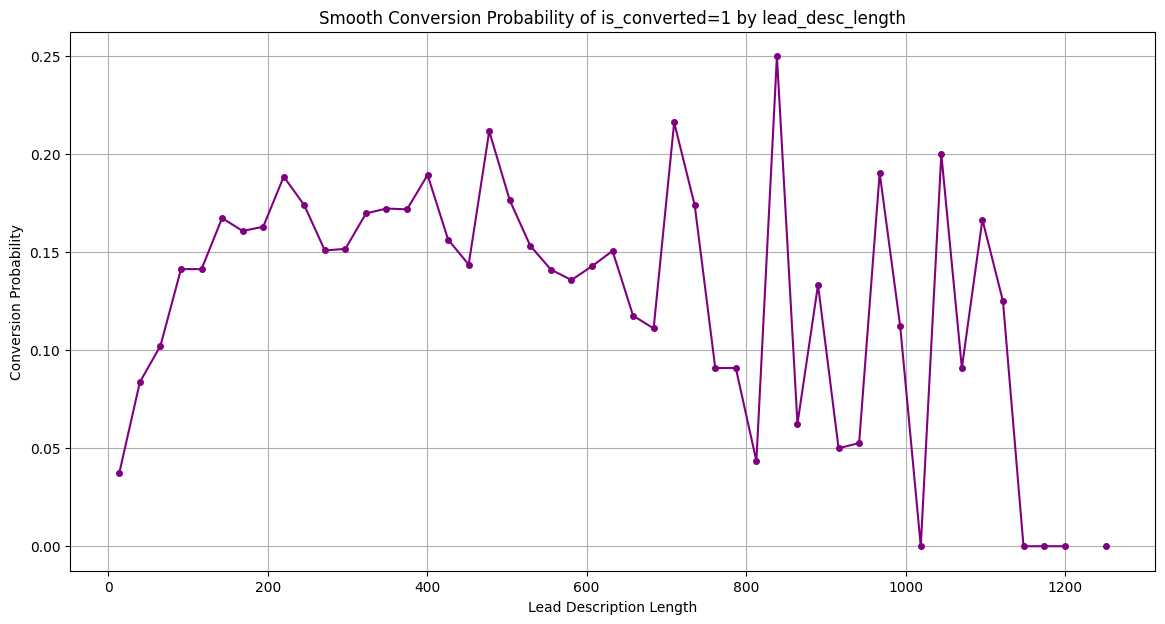

In [ ]:
# 'lead_desc_length' 값에 따른 'is_converted'가 1인 변환 확률을 스무스하게 나타내기 위해 구간별로 나누어 계산
# 'lead_desc_length' 값을 구간화하기 위해 pd.cut 함수 사용

# 'lead_desc_length'의 최소값과 최대값을 기준으로 구간 범위 설정
min_length = train['lead_desc_length'].min()
max_length = train['lead_desc_length'].max()

# 구간화를 위한 bins 생성 (예: 100개의 구간으로 나눔)
bins = np.linspace(min_length, max_length, 50)

# 구간별로 데이터를 나누고 각 구간에서 'is_converted'의 평균을 계산
train['length_bin'] = pd.cut(train['lead_desc_length'], bins=bins, include_lowest=True)
conversion_rate_by_bin = train.groupby('length_bin')['is_converted'].mean()

# 구간의 중앙값을 x축 데이터로 사용하기 위해 각 구간별 중앙값 계산
bin_centers = [(a.left + a.right) / 2 for a in conversion_rate_by_bin.index.categories]

# 스무스한 변환 확률 그래프를 생성
plt.figure(figsize=(14, 7))
plt.plot(bin_centers, conversion_rate_by_bin, linestyle='-', marker='o', color='purple', markersize=4)
plt.title('Smooth Conversion Probability of is_converted=1 by lead_desc_length')
plt.xlabel('Lead Description Length')
plt.ylabel('Conversion Probability')
plt.grid(True)
plt.show()


## inquiry_type
### 고객의 문의 유형


In [ ]:
train_inquiry_type = train[['inquiry_type','is_converted']].copy()
test_inquiry_type = test[['inquiry_type']].copy()
train_inquiry_type['inquiry_type'].unique(), test_inquiry_type['inquiry_type'].unique() #겹치는게 test에 거의 없음

(array(['consultation', 'information', 'other', 'training', 'missing'],
       dtype=object),
 array(['missing', 'consultation', 'information', 'other', 'training'],
       dtype=object))

In [ ]:
# Extracting the unique 'inquiry_type' values from submission_origin and checking their presence in train
unique_inquiry_type_submission = set(test['inquiry_type'].unique())
unique_inquiry_type_train = set(train['inquiry_type'].unique())

# Identifying which 'inquiry_type' values from submission_origin exist in train
inquiry_type_existence = {inquiry_type: inquiry_type in unique_inquiry_type_train for inquiry_type in unique_inquiry_type_submission}

# Calculating the conversion summary for 'inquiry_type' in train data
conversion_summary = train.groupby('inquiry_type')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('inquiry_type')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(inquiry_type_existence)
inquiry_type_counts_submission = test['inquiry_type'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(inquiry_type_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
inquiry_type,,,,,,,
consultation,35877,0.095800,0.904200,3437,32440,True,3652
other,10046,0.065996,0.934004,663,9383,True,238
information,1005,0.009950,0.990050,10,995,True,68
missing,840,0.167857,0.832143,141,699,True,1292
training,354,0.005650,0.994350,2,352,True,21


In [ ]:
test['inquiry_type'].value_counts()

consultation    3652
missing         1292
other            238
information       68
training          21
Name: inquiry_type, dtype: int64

## product_category
### 요청 제품 카테고리


In [ ]:
train_product_category = train[['product_category','is_converted']].copy()
test_product_category = test[['product_category']].copy()
train_product_category['product_category'].unique(), test_product_category['product_category'].unique() #겹치는게 test에 거의 없음

(array(['multi-split', 'single-split', 'vrf', 'chiller', 'others',
        'software solution', 'standard signage', 'high brightness signage',
        'interactive signage', 'video wall signage', 'led signage',
        'hotel tv', 'oled signage', 'one:quick series', 'special signage',
        'pro:centric', 'webos', 'hospital tv', 'monitor'], dtype=object),
 array(['others', 'hospital tv', 'led signage', 'standard signage',
        'interactive signage', 'multi-split', 'video wall signage', 'vrf',
        'monitor', 'single-split', 'high brightness signage', 'chiller',
        'oled signage', 'special signage', 'hotel tv', 'pro:centric',
        'software solution', 'one:quick series', 'webos'], dtype=object))

In [ ]:
# Extracting the unique 'product_category' values from submission_origin and checking their presence in train
unique_product_category_submission = set(test['product_category'].unique())
unique_product_category_train = set(train['product_category'].unique())

# Identifying which 'product_category' values from submission_origin exist in train
product_category_existence = {product_category: product_category in unique_product_category_train for product_category in unique_product_category_submission}

# Calculating the conversion summary for 'product_category' in train data
conversion_summary = train.groupby('product_category')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('product_category')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(product_category_existence)
product_category_counts_submission = test['product_category'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(product_category_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
product_category,,,,,,,
others,26691,0.056948,0.943052,1520,25171,True,2337
vrf,4950,0.097778,0.902222,484,4466,True,726
multi-split,3472,0.089862,0.910138,312,3160,True,544
video wall signage,1844,0.182755,0.817245,337,1507,True,167
interactive signage,1716,0.170746,0.829254,293,1423,True,400
led signage,1687,0.168939,0.831061,285,1402,True,289
single-split,1451,0.057891,0.942109,84,1367,True,179
oled signage,1156,0.119377,0.880623,138,1018,True,104
hotel tv,1014,0.243590,0.756410,247,767,True,134


## product_subcategory

In [ ]:
train_product_subcategory = train[['product_subcategory','is_converted']].copy()
test_product_subcategory = test[['product_subcategory']].copy()
train_product_subcategory['product_subcategory'].unique(), test_product_subcategory['product_subcategory'].unique() #겹치는게 test에 거의 없음

(array(['others', 'New High Haze UHD Standard Signage',
        'Window Facing Display', 'LG CreateBoard', 'TR3DJ Series',
        'webOS UHD Signage', 'TN3F Series', 'SM3G Series',
        '55" 500 nits FHD 0.44mm Even Bezel Video Wall', 'UH5F-H Series',
        'Interactive Digital Board', 'Createboard', 'UHD TV Signage',
        '55" 700 nits FHD 0.44mm Even Bezel Video Wall', 'LT340C Series',
        'Ultra Narrow Bezel Video Wall', 'Fine-pitch Essential Series',
        'UT640S Series', 'Outdoor Display', 'TR3BG Series',
        'SuperSign CMS', 'Touch Open Frame', 'Ultra Slim Series',
        'LG MAGNIT', 'Indoor Versatile Series', 'VL5F Series',
        'Transparent OLED', 'TA3E Series', 'OneQuick Flex',
        'Compact Series', 'TR3BF Series', '4K UHD Smart TV',
        'Transparent LED Film', 'One:Quick Flex',
        'Transparent OLED Signage', 'LG Simple Editor',
        'Transparent OLED Touch Signage', 'Full HD Standard Signage',
        'VL7F Series', '49" 500 nits FHD S

In [ ]:
# Extracting the unique 'product_subcategory' values from submission_origin and checking their presence in train
unique_product_subcategory_submission = set(test['product_subcategory'].unique())
unique_product_subcategory_train = set(train['product_subcategory'].unique())

# Identifying which 'product_subcategory' values from submission_origin exist in train
product_subcategory_existence = {product_subcategory: product_subcategory in unique_product_subcategory_train for product_subcategory in unique_product_subcategory_submission}

# Calculating the conversion summary for 'product_subcategory' in train data
conversion_summary = train.groupby('product_subcategory')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('product_subcategory')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 13]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(product_subcategory_existence)
product_subcategory_counts_submission = test['product_subcategory'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(product_subcategory_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
product_subcategory,,,,,,,
others,40847,0.076603,0.923397,3129,37718,True,4571.0
Interactive Digital Board,394,0.205584,0.794416,81,313,True,29.0
TR3BF Series,363,0.137741,0.862259,50,313,True,3.0
All Medical Displays,285,0.031579,0.968421,9,276,True,1.0
"49"" 500 nits FHD Slim Bezel Video Wall",249,0.156627,0.843373,39,210,True,15.0
...,...,...,...,...,...,...,...
All Cloud Devices,16,0.000000,1.000000,0,16,True,1.0
Fine-pitch Essential Series,15,0.266667,0.733333,4,11,True,2.0
LG Simple Editor,15,0.200000,0.800000,3,12,NaN,NaN


## product_modelname
### 요청 제품 모델명


In [ ]:
train_product_modelname = train[['product_modelname','is_converted']].copy()
test_product_modelname = test[['product_modelname']].copy()
train_product_modelname['product_modelname'].unique(), test_product_modelname['product_modelname'].unique() #겹치는게 test에 거의 없음

(array([nan, '98UH5J-H', '75XS4G', '86TR3DK', '43UR640S', '86TR3DJ',
        '75UL3J-B', '22SM3G-B', '55VSM5J', '55UH5F-H', '75TC3D', '86TR3PJ',
        '65UR640S (ASIA)', '55VSH7J', '43LT340C (EU)', '55LV77D',
        'LAS009-F', '55UT640S (ASIA)', '98TR3PJ', '75TR3DJ', '55TR3BG',
        '65TR3DK', '43TNF5J', '43LT341H (EU)', '55UL3J-B',
        '55UR640S (EU/CIS)', '55UR640S', 'LSAB009', 'LSCA039', '55VL5F-A',
        '55EW5G', '43TA3E', '43HT3WJ', '43UL3J', '86TR3E', '65TR3BF-B',
        '65UQ801C (INDIA)', '32LT340C', 'LAT140', 'LSCB018', '55CT5WJ-ZJ',
        '55EW5PG-S', '55VH7B', '86UH5J-H', '55EW5TK-A', '32SM5J-B',
        '55VL7F-A', '49VL5G-M', '55CT5WJ', '65TR3DJ', '32SM5J', '65EV5E',
        '55VL5F', '55TC3CD', '110UM5J', '49XE4F-M', '75UH5J-H', '55EW5G-V',
        '49VL5G', '49VL5PJ', '55LV75D', '55XS4J-B', '55VM5J-H', 'SC-00DA',
        '85TR3BF', '55VX1D', '49LT560H (NA)', 'LG SuperSign CMS',
        '55UH5F-B', '49VL5F-A', '55LV35A', '55EF5G-P', '49LT340C',
        '5

In [ ]:
# Extracting the unique 'product_modelname' values from submission_origin and checking their presence in train
unique_product_modelname_submission = set(test['product_modelname'].unique())
unique_product_modelname_train = set(train['product_modelname'].unique())

# Identifying which 'product_modelname' values from submission_origin exist in train
product_modelname_existence = {product_modelname: product_modelname in unique_product_modelname_train for product_modelname in unique_product_modelname_submission}

# Calculating the conversion summary for 'product_modelname' in train data
conversion_summary = train.groupby('product_modelname')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('product_modelname')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 60]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(product_modelname_existence)
product_modelname_counts_submission = test['product_modelname'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(product_modelname_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
product_modelname,,,,,,,
43HT3WJ,274,0.120438,0.879562,33,241,True,5.0
55CT5WJ,251,0.163347,0.836653,41,210,True,6.0
All Medical Displays,212,0.000000,1.000000,0,212,NaN,NaN
55VSM5J,181,0.232044,0.767956,42,139,True,18.0
UltraFine Ergo(32UN880),172,0.000000,1.000000,0,172,True,2.0
75TC3D,152,0.184211,0.815789,28,124,True,5.0
86TR3E,136,0.191176,0.808824,26,110,True,10.0
55VSH7J,129,0.201550,0.798450,26,103,True,19.0
LAT140,126,0.126984,0.873016,16,110,True,35.0


In [ ]:
test['product_modelname'].value_counts()

LAT140             35
55EF5F-L           27
LWBC039            22
55VSH7J            19
55VSM5J            18
                   ..
Conference room     1
86TR3DK             1
LAEC018             1
Createboard         1
55TR3BG-BX          1
Name: product_modelname, Length: 190, dtype: int64

## customer_country.1

## customer_position
### 고객의 회사 직책


In [ ]:
train_customer_position = train[['customer_position','is_converted']].copy()
test_customer_position = test[['customer_position']].copy()
train_customer_position['customer_position'].unique(), test_customer_position['customer_position'].unique() #겹치는게 test에 거의 없음

(array(['entry level', 'ceo/founder', 'partner', 'manager',
        'vice president', 'associate/analyst', 'c-level executive', 'none',
        'director', 'other', 'others', 'trainee'], dtype=object),
 array(['none', 'manager', 'others', 'associate/analyst', 'director',
        'entry level', 'ceo/founder', 'partner', 'c-level executive',
        'trainee', 'vice president', 'other'], dtype=object))

In [ ]:
# Extracting the unique 'customer_position' values from submission_origin and checking their presence in train
unique_customer_position_submission = set(test['customer_position'].unique())
unique_customer_position_train = set(train['customer_position'].unique())

# Identifying which 'customer_position' values from submission_origin exist in train
customer_position_existence = {customer_position: customer_position in unique_customer_position_train for customer_position in unique_customer_position_submission}

# Calculating the conversion summary for 'customer_position' in train data
conversion_summary = train.groupby('customer_position')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('customer_position')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 1]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(customer_position_existence)
customer_position_counts_submission = test['customer_position'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(customer_position_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
customer_position,,,,,,,
none,13714,0.090710,0.909290,1244,12470,True,1957
ceo/founder,7191,0.085941,0.914059,618,6573,True,593
manager,7186,0.109519,0.890481,787,6399,True,726
other,5025,0.077015,0.922985,387,4638,True,25
director,4451,0.092563,0.907437,412,4039,True,343
partner,2363,0.094372,0.905628,223,2140,True,224
associate/analyst,2306,0.130095,0.869905,300,2006,True,279
entry level,2028,0.043886,0.956114,89,1939,True,225
others,1838,0.035909,0.964091,66,1772,True,711


In [ ]:
test['customer_position'].value_counts()

none                 1957
manager               726
others                711
ceo/founder           593
director              343
associate/analyst     279
entry level           225
partner               224
c-level executive      85
vice president         54
trainee                49
other                  25
Name: customer_position, dtype: int64

## response_corporate
### 담당 자사 법인명


In [ ]:
train_response_corporate = train[['response_corporate','is_converted']].copy()
test_response_corporate = test[['response_corporate']].copy()
train_response_corporate['response_corporate'].unique(), test_response_corporate['response_corporate'].unique() #겹치는게 test에 거의 없음

(array(['LGEPH', 'LGEIL', 'LGEAF', 'LGESJ', 'LGESL', 'LGESP', 'LGEGF',
        'LGESA', 'LGEUS', 'LGECB', 'LGEMS', 'LGEEG', 'LGEEF', 'LGEAP',
        'LGEIN', 'LGEUK', 'LGEPS', 'LGECI', 'LGECL', 'LGETK', 'LGELF',
        'LGEPT', 'LGEPR', 'LGEDG', 'others', 'LGEMK', 'LGEPL', 'LGEES',
        'LGEAR', 'LGEHK', 'LGEML', 'LGEHS', 'LGEAS', 'LGEYK', 'LGEIS',
        'LGEBN', 'LGEFS', 'LGETH', 'LGEVH', 'LGECH'], dtype=object),
 array(['LGESP', 'LGEUS', 'LGEGF', 'LGEDG', 'LGEEG', 'LGEFS', 'LGEIN',
        'LGEIL', 'LGEIS', 'LGEAR', 'LGETK', 'LGESJ', 'LGEPH', 'LGEPR',
        'LGEVH', 'LGEAP', 'LGECL', 'LGECB', 'LGEHK', 'LGEMS', 'LGETH',
        'LGEMK', 'LGEBN', 'LGEPS', 'LGEUK', 'LGESA', 'LGESL', 'LGEYK',
        'others', 'LGEEF', 'LGECH', 'LGECI', 'LGEAF', 'LGEPL', 'LGEES',
        'LGEHS', 'LGEAS', 'LGELF', 'LGEPT', 'LGEML'], dtype=object))

In [ ]:
# Extracting the unique 'response_corporate' values from submission_origin and checking their presence in train
unique_response_corporate_submission = set(test['response_corporate'].unique())
unique_response_corporate_train = set(train['response_corporate'].unique())

# Identifying which 'response_corporate' values from submission_origin exist in train
response_corporate_existence = {response_corporate: response_corporate in unique_response_corporate_train for response_corporate in unique_response_corporate_submission}

# Calculating the conversion summary for 'response_corporate' in train data
conversion_summary = train.groupby('response_corporate')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('response_corporate')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 1]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(response_corporate_existence)
response_corporate_counts_submission = test['response_corporate'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(response_corporate_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
response_corporate,,,,,,,
LGEIL,14894,0.078354,0.921646,1167,13727,True,907
LGESP,7446,0.087832,0.912168,654,6792,True,1045
LGEUS,4295,0.138068,0.861932,593,3702,True,1009
LGEPH,2431,0.080214,0.919786,195,2236,True,289
LGEMS,2141,0.068660,0.931340,147,1994,True,181
LGEGF,1892,0.136892,0.863108,259,1633,True,151
LGECB,1769,0.040136,0.959864,71,1698,True,126
LGEUK,1314,0.015982,0.984018,21,1293,True,42
LGECL,1088,0.086397,0.913603,94,994,True,110


In [ ]:
test['response_corporate'].value_counts()

LGESP     1045
LGEUS     1009
LGEIL      907
LGEPH      289
LGEPR      212
LGEMS      181
LGEGF      151
LGECB      126
LGEIS      123
LGECL      110
LGESJ      102
LGEEG       96
LGEIN       96
LGEPS       94
LGEDG       73
LGEVH       70
LGEAR       65
LGEAP       64
LGETK       51
LGEHK       48
LGESL       46
LGEPL       44
LGEUK       42
LGEMK       41
LGETH       40
LGEHS       20
LGESA       19
LGECI       17
LGEES       17
LGEFS       16
LGEAF       13
others       9
LGEBN        7
LGEAS        7
LGECH        5
LGELF        5
LGEEF        4
LGEPT        4
LGEML        2
LGEYK        1
Name: response_corporate, dtype: int64

## expected_timeline
### 고객의 요청한 처리 일정


In [ ]:
train_expected_timeline = train[['expected_timeline','is_converted']].copy()
test_expected_timeline = test[['expected_timeline']].copy()
train_expected_timeline['expected_timeline'].unique(), test_expected_timeline['expected_timeline'].unique() #겹치는게 test에 거의 없음

(array(['less than 3 months', nan, '3 months ~ 6 months',
        '9 months ~ 1 year', 'more than a year', '6 months ~ 9 months',
        'quote has been sent to customer.',
        'partner was exploring on eol model for some requiremeent. no designated sales or closure expected hence closing in the system.',
        'already close in july purchse with rd',
        'client not interested in product.. receing call and not answering properly',
        'being followed up', 'being followed up.',
        'repeated inquiry from client. he was just inquiring but have not confimred on purchase. we have tried mulitple times but client is not interested in buying.',
        'update- 7th aug--demo given. customer will confirm next week',
        "tried to reach him multipe times from last 7 days but couldn't get through",
        'details send', 'discused with ankit in dehli',
        'requires detail for tender. no purchase requirement right now.',
        'partner is into static signages. he n

In [ ]:
# Extracting the unique 'expected_timeline' values from submission_origin and checking their presence in train
unique_expected_timeline_submission = set(test['expected_timeline'].unique())
unique_expected_timeline_train = set(train['expected_timeline'].unique())

# Identifying which 'expected_timeline' values from submission_origin exist in train
expected_timeline_existence = {expected_timeline: expected_timeline in unique_expected_timeline_train for expected_timeline in unique_expected_timeline_submission}

# Calculating the conversion summary for 'expected_timeline' in train data
conversion_summary = train.groupby('expected_timeline')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('expected_timeline')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(expected_timeline_existence)
expected_timeline_counts_submission = test['expected_timeline'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(expected_timeline_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
expected_timeline,,,,,,,
less than 3 months,16492,0.102777,0.897223,1695,14797,True,1734.0
3 months ~ 6 months,4701,0.078919,0.921081,371,4330,True,426.0
more than a year,2840,0.042958,0.957042,122,2718,True,272.0
9 months ~ 1 year,1051,0.073264,0.926736,77,974,True,264.0
6 months ~ 9 months,1018,0.074656,0.925344,76,942,True,167.0
less than 6 months,108,0.018519,0.981481,2,106,NaN,NaN
etc.,95,0.000000,1.000000,0,95,NaN,NaN
less_than_3_months,75,0.053333,0.946667,4,71,NaN,NaN
being followed up,66,0.075758,0.924242,5,61,NaN,NaN


In [ ]:
train['expected_timeline'].value_counts()

less than 3 months                                                                                                                                                   5216
3 months ~ 6 months                                                                                                                                                  1259
more than a year                                                                                                                                                     1119
6 months ~ 9 months                                                                                                                                                   356
9 months ~ 1 year                                                                                                                                                     289
less_than_3_months                                                                                                                                    

In [ ]:
test['expected_timeline'].value_counts()

less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: expected_timeline, dtype: int64

## ver_cus
### 특정 Vertical Level 1(사업영역) 이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치

In [ ]:
train_ver_cus = train[['ver_cus','is_converted']].copy()
test_ver_cus = test[['ver_cus']].copy()
train_ver_cus['ver_cus'].unique(), test_ver_cus['ver_cus'].unique() #겹치는게 test에 거의 없음

(array([1, 0]), array([1, 0]))

In [ ]:
unique_ver_cus_submission = set(test['ver_cus'].unique())
unique_ver_cus_train = set(train['ver_cus'].unique())
ver_cus_existence = {ver_cus: ver_cus in unique_ver_cus_train for ver_cus in unique_ver_cus_submission}
conversion_summary = train.groupby('ver_cus')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('ver_cus')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(ver_cus_existence)
ver_cus_counts_submission = test['ver_cus'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(ver_cus_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
ver_cus,,,,,,,
0,53400,0.079213,0.920787,4230,49170,True,4497
1,2380,0.163866,0.836134,390,1990,True,774


In [ ]:
test['ver_cus'].value_counts()

0    4497
1     774
Name: ver_cus, dtype: int64

## ver_pro

In [ ]:
train_ver_pro = train[['ver_pro','is_converted']].copy()
test_ver_pro = test[['ver_pro']].copy()
train_ver_pro['ver_pro'].unique(), test_ver_pro['ver_pro'].unique() #겹치는게 test에 거의 없음

(array([0, 1]), array([0, 1]))

In [ ]:
unique_ver_pro_submission = set(test['ver_pro'].unique())
unique_ver_pro_train = set(train['ver_pro'].unique())
ver_pro_existence = {ver_pro: ver_pro in unique_ver_pro_train for ver_pro in unique_ver_pro_submission}
conversion_summary = train.groupby('ver_pro')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('ver_pro')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(ver_pro_existence)
ver_pro_counts_submission = test['ver_pro'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(ver_pro_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
ver_pro,,,,,,,
0,52847,0.082294,0.917706,4349,48498,True,4842
1,2933,0.092397,0.907603,271,2662,True,429


In [ ]:
test['ver_pro'].value_counts()

0    4842
1     429
Name: ver_pro, dtype: int64

## ver_win_rate_x
### 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값

In [ ]:
train_ver_win_rate_x = train[['ver_win_rate_x','is_converted']].copy()
test_ver_win_rate_x = test[['ver_win_rate_x']].copy()
train_ver_win_rate_x['ver_win_rate_x'].unique(), test_ver_win_rate_x['ver_win_rate_x'].unique() #겹치는게 test에 거의 없음

(array([3.07928766e-03,            nan, 5.71955128e-04, 7.16773438e-04,
        6.04403367e-05, 5.43222432e-04, 2.98310405e-04, 9.65915661e-05,
        1.18272889e-03, 2.15363418e-04, 2.31593813e-06, 1.27659029e-05,
        2.58895523e-05]),
 array([1.18272889e-03, 1.27659029e-05, 6.04403367e-05, 3.07928766e-03,
                   nan, 2.98310405e-04, 5.71955128e-04, 2.15363418e-04,
        5.43222432e-04, 7.16773438e-04, 2.58895523e-05, 9.65915661e-05,
        2.31593813e-06]))

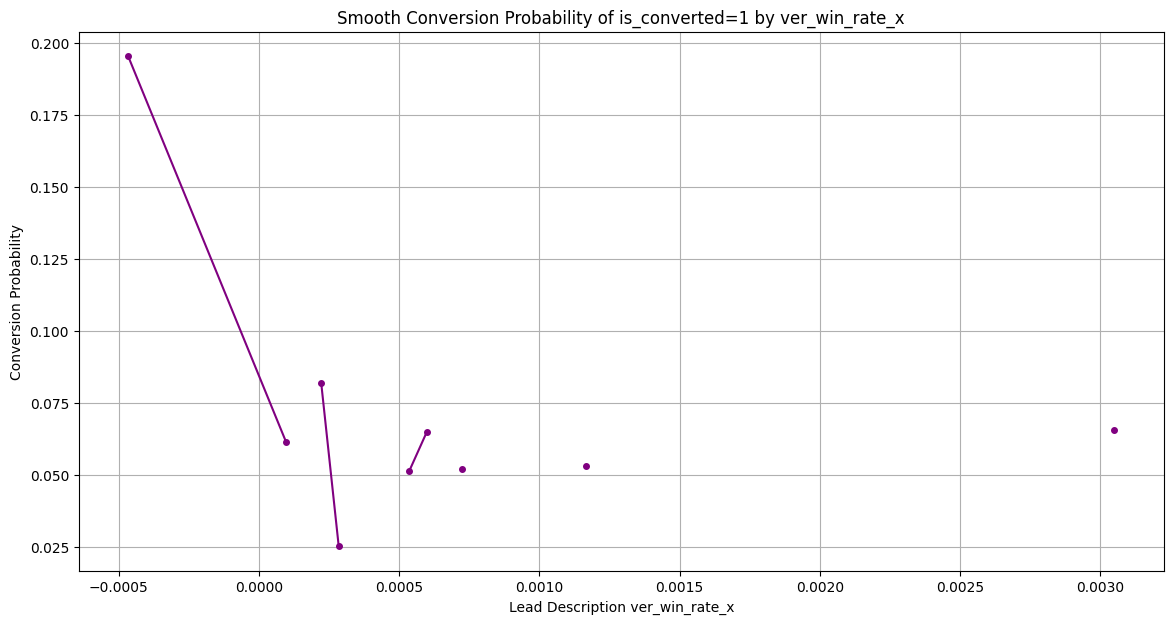

In [ ]:
# 'ver_win_rate_x' 값에 따른 'is_converted'가 1인 변환 확률을 스무스하게 나타내기 위해 구간별로 나누어 계산
# 'ver_win_rate_x' 값을 구간화하기 위해 pd.cut 함수 사용

# 'ver_win_rate_x'의 최소값과 최대값을 기준으로 구간 범위 설정
min_ver_win_rate_x = train['ver_win_rate_x'].min()
max_ver_win_rate_x = train['ver_win_rate_x'].max()

# 구간화를 위한 bins 생성 (예: 100개의 구간으로 나눔)
bins = np.linspace(min_ver_win_rate_x, max_ver_win_rate_x, 50)

# 구간별로 데이터를 나누고 각 구간에서 'is_converted'의 평균을 계산
train['ver_win_rate_x_bin'] = pd.cut(train['ver_win_rate_x'], bins=bins, include_lowest=True)
conversion_rate_by_bin = train.groupby('ver_win_rate_x_bin')['is_converted'].mean()

# 구간의 중앙값을 x축 데이터로 사용하기 위해 각 구간별 중앙값 계산
bin_centers = [(a.left + a.right) / 2 for a in conversion_rate_by_bin.index.categories]

# 스무스한 변환 확률 그래프를 생성
plt.figure(figsize=(14, 7))
plt.plot(bin_centers, conversion_rate_by_bin, linestyle='-', marker='o', color='purple', markersize=4)
plt.title('Smooth Conversion Probability of is_converted=1 by ver_win_rate_x')
plt.xlabel('Lead Description ver_win_rate_x')
plt.ylabel('Conversion Probability')
plt.grid(True)
plt.show()


## ver_win_ratio_per_bu

In [ ]:
train_ver_win_ratio_per_bu = train[['ver_win_ratio_per_bu','is_converted']].copy()
test_ver_win_ratio_per_bu = test[['ver_win_ratio_per_bu']].copy()
train_ver_win_ratio_per_bu['ver_win_ratio_per_bu'].unique(), test_ver_win_ratio_per_bu['ver_win_ratio_per_bu'].unique() #겹치는게 test에 거의 없음

(array([0.02684564,        nan, 0.06456612, 0.03448276, 0.04862953,
        0.05147059, 0.06407035, 0.02263374, 0.12857143, 0.13114754,
        0.03548387, 0.02012072, 0.07941176, 0.02272727, 0.04984026,
        0.01158301, 0.07134503, 0.03691275, 0.06092437, 0.28571429,
        0.22727273, 0.05357143, 0.03157895, 0.02877698]),
 array([0.04984026,        nan, 0.13114754, 0.06456612, 0.05357143,
        0.02012072, 0.04862953, 0.02684564, 0.06092437, 0.01158301,
        0.05147059, 0.06407035, 0.03548387, 0.03157895, 0.07134503,
        0.07941176, 0.02263374, 0.12857143, 0.02877698, 0.03691275,
        0.28571429, 0.22727273, 0.02272727]))

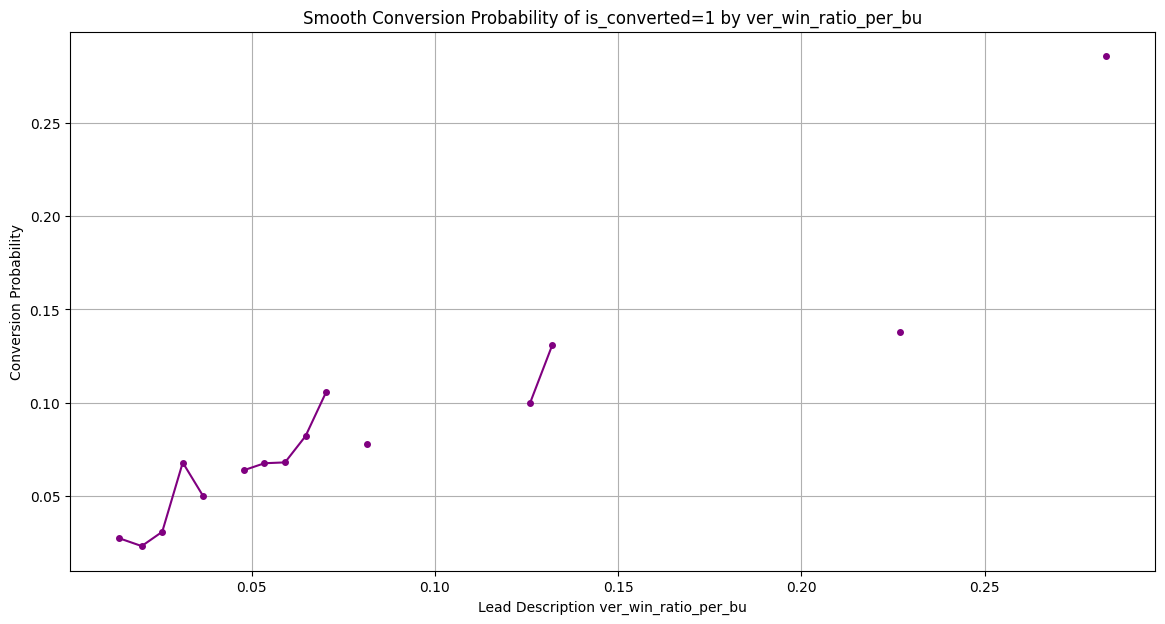

In [ ]:
# 'ver_win_ratio_per_bu' 값에 따른 'is_converted'가 1인 변환 확률을 스무스하게 나타내기 위해 구간별로 나누어 계산
# 'ver_win_ratio_per_bu' 값을 구간화하기 위해 pd.cut 함수 사용

# 'ver_win_ratio_per_bu'의 최소값과 최대값을 기준으로 구간 범위 설정
min_ver_win_ratio_per_bu = train['ver_win_ratio_per_bu'].min()
max_ver_win_ratio_per_bu = train['ver_win_ratio_per_bu'].max()

# 구간화를 위한 bins 생성 (예: 100개의 구간으로 나눔)
bins = np.linspace(min_ver_win_ratio_per_bu, max_ver_win_ratio_per_bu, 50)

# 구간별로 데이터를 나누고 각 구간에서 'is_converted'의 평균을 계산
train['ver_win_ratio_per_bu_bin'] = pd.cut(train['ver_win_ratio_per_bu'], bins=bins, include_lowest=True)
conversion_rate_by_bin = train.groupby('ver_win_ratio_per_bu_bin')['is_converted'].mean()

# 구간의 중앙값을 x축 데이터로 사용하기 위해 각 구간별 중앙값 계산
bin_centers = [(a.left + a.right) / 2 for a in conversion_rate_by_bin.index.categories]

# 스무스한 변환 확률 그래프를 생성
plt.figure(figsize=(14, 7))
plt.plot(bin_centers, conversion_rate_by_bin, linestyle='-', marker='o', color='purple', markersize=4)
plt.title('Smooth Conversion Probability of is_converted=1 by ver_win_ratio_per_bu')
plt.xlabel('Lead Description ver_win_ratio_per_bu')
plt.ylabel('Conversion Probability')
plt.grid(True)
plt.show()


## business_area
### 고객의 사업 영역


In [ ]:
train_business_area = train[['business_area','is_converted']].copy()
test_business_area = test[['business_area']].copy()
train_business_area['business_area'].unique(), test_business_area['business_area'].unique() #겹치는게 test에 거의 없음

(array(['corporate / office', nan, 'education', 'hotel & accommodation',
        'hospital & health care', 'special purpose', 'residential (home)',
        'government department', 'retail', 'factory',
        'power plant / renewable energy', 'transportation',
        'public facility'], dtype=object),
 array(['retail', 'transportation', 'hospital & health care',
        'corporate / office', nan, 'residential (home)', 'education',
        'factory', 'special purpose', 'hotel & accommodation',
        'public facility', 'government department',
        'power plant / renewable energy'], dtype=object))

In [ ]:
train_business_area['business_area'].nunique(), test_business_area['business_area'].nunique() #겹치는게 test에 거의 없음

(12, 12)

In [ ]:
# Extracting the unique 'business_area' values from both dataframes
unique_business_area_submission = set(test['business_area'].unique())
unique_business_area_train = set(train['business_area'].unique())

# Checking if all unique 'business_area' values from submission_origin are present in train
all_jobs_in_train = unique_business_area_submission.issubset(unique_business_area_train)

# The presence status and the count of unique 'business_area' in both datasets
all_jobs_in_train, len(unique_business_area_submission), len(unique_business_area_train)

jobs_not_in_train = unique_business_area_submission.difference(unique_business_area_train)

# Identifying which 'business_area' values from submission_origin exist in train
jobs_in_train = unique_business_area_submission.intersection(unique_business_area_train)

# The jobs that do not exist and exist in train
jobs_not_in_train, jobs_in_train
# test께 train에 다 포함

(set(),
 {'corporate / office',
  'education',
  'factory',
  'government department',
  'hospital & health care',
  'hotel & accommodation',
  nan,
  'power plant / renewable energy',
  'public facility',
  'residential (home)',
  'retail',
  'special purpose',
  'transportation'})

In [ ]:
unique_business_area_submission = set(test['business_area'].unique())
unique_business_area_train = set(train['business_area'].unique())
business_area_existence = {business_area: business_area in unique_business_area_train for business_area in unique_business_area_submission}
conversion_summary = train.groupby('business_area')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('business_area')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(business_area_existence)
business_area_counts_submission = test['business_area'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(business_area_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
business_area,,,,,,,
corporate / office,3989,0.065430,0.934570,261,3728,True,581
retail,2924,0.053010,0.946990,155,2769,True,318
hotel & accommodation,1960,0.052041,0.947959,102,1858,True,177
special purpose,1873,0.051255,0.948745,96,1777,True,93
residential (home),1786,0.025196,0.974804,45,1741,True,124
education,1682,0.064804,0.935196,109,1573,True,312
hospital & health care,1023,0.300098,0.699902,307,716,True,133
factory,1013,0.081935,0.918065,83,930,True,77
government department,635,0.061417,0.938583,39,596,True,48


## business_subarea

In [ ]:
train_business_subarea = train[['business_subarea','is_converted']].copy()
test_business_subarea = test[['business_subarea']].copy()
train_business_subarea['business_subarea'].unique(), test_business_subarea['business_subarea'].unique() #겹치는게 test에 거의 없음

(array(['Engineering', 'Advertising', 'Construction', 'IT/Software', nan,
        'Manufacturing', 'Energy', 'Developer/Property', 'Entertainment',
        'Agriculture', 'Pharmaceutical', 'Others', 'Banking', 'Consulting',
        'Healthcare', 'Finance', 'Broadcasting & Media',
        'Distribution Center', 'Law Firm', 'Logistics',
        'Telecommunication', 'Aerospace', 'Network/Cabling', 'Insurance',
        'Institute & Academy', 'Hotel', 'K12 Kindergarten & Schools',
        'Hospital', 'Mixed-use (Multi Complex)',
        'Telecom Base Station / Data, Call',
        'Botanical Garden / Green House',
        'Higher Education (College & University)', 'Clinic',
        'General Hospital', 'Fitness', 'LTC(Long-Term Care)',
        'Villa / Single-Family Home', 'Apartment', 'Townhouse',
        'Officetel', 'General Government Office', 'Military',
        'Police / Fire station', 'Welfare Facilities', 'Other Stores',
        'Luxury(Watch/Jewelry Shop)', 'Electronics & Telco',
  

In [ ]:
train_business_subarea['business_subarea'].nunique(), test_business_subarea['business_subarea'].nunique() # test 꺼는 다 train에 있음

(86, 80)

In [ ]:
unique_business_subarea_submission = set(test['business_subarea'].unique())
unique_business_subarea_train = set(train['business_subarea'].unique())
all_jobs_in_train = unique_business_subarea_submission.issubset(unique_business_subarea_train)
all_jobs_in_train, len(unique_business_subarea_submission), len(unique_business_subarea_train)
jobs_not_in_train = unique_business_subarea_submission.difference(unique_business_subarea_train)
jobs_in_train = unique_business_subarea_submission.intersection(unique_business_subarea_train)
jobs_not_in_train

set()

In [ ]:
unique_business_subarea_submission = set(test['business_subarea'].unique())
unique_business_subarea_train = set(train['business_subarea'].unique())
business_subarea_existence = {business_subarea: business_subarea in unique_business_subarea_train for business_subarea in unique_business_subarea_submission}
conversion_summary = train.groupby('business_subarea')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('business_subarea')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(business_subarea_existence)
business_subarea_counts_submission = test['business_subarea'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(business_subarea_counts_submission)
conversion_summary_rearranged

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
business_subarea,,,,,,,
Others,825,0.110303,0.889697,91,734,True,667
Other Stores,207,0.082126,0.917874,17,190,True,82
Engineering,150,0.113333,0.886667,17,133,True,36
Construction,148,0.128378,0.871622,19,129,True,34
Manufacturing Factory / Plant,145,0.186207,0.813793,27,118,True,40
Higher Education (College & University),133,0.150376,0.849624,20,113,True,111
Villa / Single-Family Home,116,0.077586,0.922414,9,107,True,35
Apartment,114,0.043860,0.956140,5,109,True,29
IT/Software,100,0.150000,0.850000,15,85,True,58


## lead_owner
### 영업 담당자 이름


In [ ]:
train_lead_owner = train[['lead_owner','is_converted']].copy()
test_lead_owner = test[['lead_owner']].copy()
train_lead_owner['lead_owner'].unique(), test_lead_owner['lead_owner'].unique() #겹치는게 test에 거의 없음

In [ ]:
z[z['lead_owner'] == 174]['is_converted'].value_counts()

False    357
Name: is_converted, dtype: int64

In [ ]:
unique_lead_owner_submission = set(test['lead_owner'].unique())
unique_lead_owner_train = set(train['lead_owner'].unique())
lead_owner_existence = {lead_owner: lead_owner in unique_lead_owner_train for lead_owner in unique_lead_owner_submission}
conversion_summary = train.groupby('lead_owner')['is_converted'].value_counts(normalize=True).unstack(fill_value=0).join(
    train.groupby('lead_owner')['is_converted'].value_counts().unstack(fill_value=0), rsuffix='_count')
conversion_summary_with_sum = conversion_summary.assign(
    sum=lambda x: x['True_count'] + x['False_count']
).sort_values(by='sum', ascending=False)
conversion_summary_rearranged = conversion_summary_with_sum[['sum', 'True', 'False', 'True_count', 'False_count']]
conversion_summary_rearranged = conversion_summary_rearranged[conversion_summary_rearranged['sum'] > 30]
conversion_summary_rearranged['Exists_in_submission_origin'] = conversion_summary_rearranged.index.map(lead_owner_existence)
lead_owner_counts_submission = test['lead_owner'].value_counts().to_dict()
conversion_summary_rearranged['Submission_origin_count'] = conversion_summary_rearranged.index.map(lead_owner_counts_submission)
conversion_summary_rearranged.head(30)

is_converted,sum,True,False,True_count,False_count,Exists_in_submission_origin,Submission_origin_count
lead_owner,,,,,,,
174,4563,0.009862,0.990138,45,4518,True,357.0
175,4090,0.000000,1.000000,0,4090,NaN,NaN
23,2281,0.013591,0.986409,31,2250,NaN,NaN
97,2275,0.000000,1.000000,0,2275,True,688.0
194,2029,0.000000,1.000000,0,2029,True,131.0
42,1087,0.002760,0.997240,3,1084,True,84.0
96,968,0.000000,1.000000,0,968,NaN,NaN
185,875,0.009143,0.990857,8,867,True,18.0
363,801,0.000000,1.000000,0,801,NaN,NaN


# 전처리 하기

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/LG_Aimers4/train.csv')
print(len(train))
test = pd.read_csv('/content/drive/MyDrive/LG_Aimers4/submission.csv')
train = train.drop_duplicates()
train = train.reset_index(drop = True)
print(len(train))

59299
55780


## bant_submit

In [ ]:
# bant_submit 컬럼 전처리
# 0.25, 0.5, 0.75를 0.5로 합치고, 0과 1은 그대로 유지
train['bant_submit'] = train['bant_submit'].apply(lambda x: 0.5 if x in [0.25, 0.5, 0.75] else x)
test['bant_submit'] = test['bant_submit'].apply(lambda x: 0.5 if x in [0.25, 0.5, 0.75] else x)

## customer_country

In [ ]:
split = train['customer_country'].str.split('/', expand=True)
condition_1 = split[1].notna() & split[2].notna()
train.loc[condition_1, 'Field'] = None
train.loc[condition_1, 'City'] = split[1]
train.loc[condition_1, 'Country'] = split[2]
# 두 번째 섹션이 비어 있음
condition_2 = split[0].notna() & split[2].notna()
train.loc[condition_2, 'Field'] = split[0]
train.loc[condition_2, 'City'] = None
train.loc[condition_2, 'Country'] = split[2]
# 세 번째 섹션이 비어 있음
condition_3 = split[0].notna() & split[1].notna()
train.loc[condition_3, 'Field'] = split[0]
train.loc[condition_3, 'City'] = split[1]
train.loc[condition_3, 'Country'] = None
# 첫 번째와 두 번째 섹션이 비어 있음
condition_4 = split[2].notna() & split[0].isna() & split[1].isna()
train.loc[condition_4, 'Field'] = None
train.loc[condition_4, 'City'] = None
train.loc[condition_4, 'Country'] = split[2]
# 첫 번째와 세 번째 섹션이 비어 있고 두 번째 섹션에만 값이 있음
condition_5 = split[1].notna() & split[0].isna() & split[2].isna()
train.loc[condition_5, 'Field'] = None
train.loc[condition_5, 'City'] = split[1]
train.loc[condition_5, 'Country'] = None
# 두 번째와 세 번째 섹션이 비어 있고 첫 번째 섹션에만 값이 있음
condition_6 = split[0].notna() & split[1].isna() & split[2].isna()
train.loc[condition_6, 'Field'] = split[0]
train.loc[condition_6, 'City'] = None
train.loc[condition_6, 'Country'] = None
# 모든 섹션이 비어 있음
condition_7 = split[0].isna() & split[1].isna() & split[2].isna()
train.loc[condition_7, ['Field', 'City', 'Country']] = None
# 모든 섹션이 채워져 있는 경우 처리 추가
condition_all_filled = split[0].notna() & split[1].notna() & split[2].notna()
train.loc[condition_all_filled, 'Field'] = split[0]
train.loc[condition_all_filled, 'City'] = split[1]
train.loc[condition_all_filled, 'Country'] = split[2]
# 이미 처리한 조건들에 대한 인덱스를 제외하고 나머지 데이터 확인을 위한 조건 재설정
remaining_conditions = ~(condition_1 | condition_2 | condition_3 | condition_4 | condition_5 | condition_6 | condition_7 | condition_all_filled)
# 처리되지 않은 나머지 데이터 확인 (있을 경우)
remaining_train = train[remaining_conditions]
remaining_sample = remaining_train[['customer_country', 'Field', 'City', 'Country']] if not remaining_train.empty else "All cases have been handled."
split = test['customer_country'].str.split('/', expand=True)
condition_1 = split[1].notna() & split[2].notna()
test.loc[condition_1, 'Field'] = None
test.loc[condition_1, 'City'] = split[1]
test.loc[condition_1, 'Country'] = split[2]
condition_2 = split[0].notna() & split[2].notna()
test.loc[condition_2, 'Field'] = split[0]
test.loc[condition_2, 'City'] = None
test.loc[condition_2, 'Country'] = split[2]
condition_3 = split[0].notna() & split[1].notna()
test.loc[condition_3, 'Field'] = split[0]
test.loc[condition_3, 'City'] = split[1]
test.loc[condition_3, 'Country'] = None
condition_4 = split[2].notna() & split[0].isna() & split[1].isna()
test.loc[condition_4, 'Field'] = None
test.loc[condition_4, 'City'] = None
test.loc[condition_4, 'Country'] = split[2]
condition_5 = split[1].notna() & split[0].isna() & split[2].isna()
test.loc[condition_5, 'Field'] = None
test.loc[condition_5, 'City'] = split[1]
test.loc[condition_5, 'Country'] = None
condition_6 = split[0].notna() & split[1].isna() & split[2].isna()
test.loc[condition_6, 'Field'] = split[0]
test.loc[condition_6, 'City'] = None
test.loc[condition_6, 'Country'] = None
condition_7 = split[0].isna() & split[1].isna() & split[2].isna()
test.loc[condition_7, ['Field', 'City', 'Country']] = None
condition_all_filled = split[0].notna() & split[1].notna() & split[2].notna()
test.loc[condition_all_filled, 'Field'] = split[0]
test.loc[condition_all_filled, 'City'] = split[1]
test.loc[condition_all_filled, 'Country'] = split[2]
remaining_conditions = ~(condition_1 | condition_2 | condition_3 | condition_4 | condition_5 | condition_6 | condition_7 | condition_all_filled)
remaining_test = test[remaining_conditions]
remaining_sample = remaining_test[['customer_country', 'Field', 'City', 'Country']] if not remaining_test.empty else "All cases have been handled."

In [ ]:
train.drop(['customer_country'],axis=1,inplace=True)
test.drop(['customer_country'],axis=1,inplace=True)

In [ ]:
print(len(train))

55780


## business_unit

In [ ]:
# value_counts가 300 이하인 unique 값들을 가진 샘플들을 제거
low_count_units = train['business_unit'].value_counts()[train['business_unit'].value_counts() <= 300].index
train = train[~train['business_unit'].isin(low_count_units)]
train = train.reset_index(drop = True)

In [ ]:
print(len(train))

55492


## com_reg_ver_win_rate

In [ ]:
# 유지

## customer_idx

In [ ]:
# customer_idx 컬럼 제거
train = train.drop(columns=['customer_idx'])
test = test.drop(columns=['customer_idx'])

## customer_type

In [ ]:
# V2 코드 수정: 'NaN' 값도 unique 값으로 유지하되 drop하지 않도록 처리
# 각 unique 값의 value_counts가 60개 이상인 unique 값을 가진 샘플들만 유지
train_customer_type_counts = train['customer_type'].value_counts()
customer_type_to_keep = train_customer_type_counts[train_customer_type_counts > 60].index

# NaN 값을 포함하여 조건에 맞는 샘플들만 유지
train = train[(train['customer_type'].isin(customer_type_to_keep)) | (train['customer_type'].isnull())]

# 'End-Customer'와 'End Customer' 통일
train['customer_type'] = train['customer_type'].replace('End Customer', 'End-Customer')
test['customer_type'] = test['customer_type'].replace('End Customer', 'End-Customer')

# 처리 후 customer_type의 unique 값 확인 및 NaN 값 포함 여부 확인
train_customer_type_unique_after = train['customer_type'].unique()
nan_included = pd.isnull(train_customer_type_unique_after).any()

train_customer_type_unique_after, nan_included

<ipython-input-878-570c4912131b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['customer_type'] = train['customer_type'].replace('End Customer', 'End-Customer')


(array(['End-Customer', 'Specifier/ Influencer', 'Service Partner',
        'Channel Partner', nan, 'Solution Eco-Partner'], dtype=object),
 True)

In [ ]:
print(len(train))

55222


## enterprise

In [ ]:
# 유지

## historical_existing_cnt

In [ ]:
train['historical_existing_cnt'].isna().sum()

43410

In [ ]:
# historical_existing_cnt이 0이면 신규 고객(0), 그렇지 않으면 비신규 고객(1)으로 나누기
train['historical_existing_cnt'] = train['historical_existing_cnt'].apply(lambda x: 0 if x == 0 else 1)
test['historical_existing_cnt'] = test['historical_existing_cnt'].apply(lambda x: 0 if x == 0 else 1)

### fillna(0)
### 이거 바꿔야할듯

## id_strategic_ver

In [ ]:
# id_strategic_ver 컬럼에서 NaN을 0으로 처리
train['id_strategic_ver'] = train['id_strategic_ver'].fillna(0)
test['id_strategic_ver'] = test['id_strategic_ver'].fillna(0)

## it_strategic_ver

In [ ]:
# it_strategic_ver 컬럼에서 NaN을 0으로 처리
train['it_strategic_ver'] = train['it_strategic_ver'].fillna(0)
test['it_strategic_ver'] = test['it_strategic_ver'].fillna(0)

## idit_strategic_ver

In [ ]:
# idit_strategic_ver 컬럼에서 NaN을 0으로 처리
train['idit_strategic_ver'] = train['idit_strategic_ver'].fillna(0)
test['idit_strategic_ver'] = test['idit_strategic_ver'].fillna(0)

## customer_job


In [ ]:
# customer_job 컬럼 처리: 샘플 개수가 50개 이상인 직업군만 유지하고 나머지는 'others'로 통합하는 함수 정의
def process_customer_job(df, significant_jobs):
    """
    샘플 개수가 50개 이상인 customer_job만 유지하고 나머지는 'others'로 통합하는 함수.
    :param df: DataFrame, 처리할 데이터셋.
    :param significant_jobs: list, 유지할 customer_job의 목록.
    :return: DataFrame, 처리된 데이터셋.
    """
    df['customer_job'] = df['customer_job'].apply(lambda x: x if x in significant_jobs else 'others')
    return df
# train 데이터셋에서 customer_job의 unique 값별 샘플 개수 계산
customer_job_counts = train['customer_job'].value_counts()
# 샘플 개수가 50개 이상인 customer_job만 유지하기 위한 리스트 생성
significant_jobs = customer_job_counts[customer_job_counts >= 50].index.tolist()
# train과 test 데이터셋에 적용
train = process_customer_job(train, significant_jobs)
test = process_customer_job(test, significant_jobs)
# 적용 후의 customer_job unique 값과 샘플 개수 확인
train_customer_job_counts_final = train['customer_job'].value_counts()
test_customer_job_counts_final = test['customer_job'].value_counts()

# 결과 출력을 위해 각각의 unique 값의 개수 확인
len(train_customer_job_counts_final), len(test_customer_job_counts_final)

(37, 34)

In [ ]:
'''
# customer_job 컬럼 처리: 샘플 개수가 50개 이상인 직업군만 유지하고 나머지는 'others'로 통합하는 함수 정의
def process_customer_job(df, significant_jobs):
    """
    샘플 개수가 50개 이상인 customer_job만 유지하고 나머지는 'others'로 통합하는 함수.
    :param df: DataFrame, 처리할 데이터셋.
    :param significant_jobs: list, 유지할 customer_job의 목록.
    :return: DataFrame, 처리된 데이터셋.
    """
    df['customer_job'] = df['customer_job'].apply(lambda x: x if x in significant_jobs else 'others')
    return df
# train 데이터셋에서 customer_job의 unique 값별 샘플 개수 계산
customer_job_counts = train['customer_job'].value_counts()
# 샘플 개수가 50개 이상인 customer_job만 유지하기 위한 리스트 생성
significant_jobs = customer_job_counts[customer_job_counts >= 50].index.tolist()
# train과 test 데이터셋에 적용
train = process_customer_job(train, significant_jobs)
test = process_customer_job(test, significant_jobs)
# 적용 후의 customer_job unique 값과 샘플 개수 확인
train_customer_job_counts_final = train['customer_job'].value_counts()
test_customer_job_counts_final = test['customer_job'].value_counts()
# 결과 출력을 위해 각각의 unique 값의 개수 확인
len(train_customer_job_counts_final), len(test_customer_job_counts_final)
'''
def process_customer_job_corrected(df, significant_jobs):
    """
    샘플 개수가 50개 이상인 customer_job만 유지하고 나머지는 'others'로 통합하는 함수.
    NaN 값은 유지됩니다.

    :param df: DataFrame, 처리할 데이터셋.
    :param significant_jobs: list, 유지할 customer_job의 목록.
    :return: DataFrame, 처리된 데이터셋.
    """
    # significant_jobs 리스트에 NaN 값을 추가하지 않고 처리
    df['customer_job'] = df['customer_job'].apply(lambda x: 'others' if x not in significant_jobs and pd.notna(x) else x)

    return df

# NaN 값이 significant_jobs 리스트에 포함되지 않도록 하여 적용
train = process_customer_job_corrected(train, significant_jobs)
test = process_customer_job_corrected(test, significant_jobs)

# 적용 후의 customer_job unique 값과 샘플 개수 확인
train_customer_job_counts_corrected = train['customer_job'].value_counts(dropna=False)  # NaN 포함하여 개수 계산
test_customer_job_counts_corrected = test['customer_job'].value_counts(dropna=False)  # NaN 포함하여 개수 계산

# 결과 출력을 위해 각각의 unique 값의 개수 확인
len(train_customer_job_counts_corrected), len(test_customer_job_counts_corrected), "NaN in train:", train['customer_job'].isnull().sum(), "NaN in test:", test['customer_job'].isnull().sum()

(37, 34, 'NaN in train:', 0, 'NaN in test:', 0)

In [ ]:
print(len(train))

55222


## lead_desc_length

In [ ]:
# lead_desc_length를 구간화하는 함수 정의
def categorize_lead_desc_length(length):
    if length <= 60:
        return 'Short'
    elif length <= 144:
        return 'Medium'
    else:
        return 'Long'

# train과 test 데이터셋에 구간화 적용
train['lead_desc_length_category'] = train['lead_desc_length'].apply(categorize_lead_desc_length)
test['lead_desc_length_category'] = test['lead_desc_length'].apply(categorize_lead_desc_length)

## inquiry_type

In [ ]:
# inquiry_type 컬럼 처리 함수 수정: NaN 값 처리 추가
def standardize_inquiry_type_corrected(df):
    # NaN 값을 'other'로 치환
    df['inquiry_type'] = df['inquiry_type'].fillna('missing').str.lower()

    # 지정된 단어를 포함하는 값 치환
    keywords_to_standardize = {
        'consultation': 'consultation',
        'other': 'other',
        'information': 'information',
        'training': 'training',
        'missing': 'missing'
    }

    for keyword, standardized_value in keywords_to_standardize.items():
        df['inquiry_type'] = df['inquiry_type'].apply(lambda x: standardized_value if keyword in x else x)

    # 지정된 치환을 제외한 나머지는 'other'로 치환
    standardized_values = list(keywords_to_standardize.values())
    df['inquiry_type'] = df['inquiry_type'].apply(lambda x: 'other' if x not in standardized_values else x)

    return df

# train과 test 데이터셋에 수정된 함수 적용
train = standardize_inquiry_type_corrected(train)
test = standardize_inquiry_type_corrected(test)

# 치환 후 inquiry_type의 unique 값 확인
train_inquiry_type_unique_after_correction = train['inquiry_type'].unique()
test_inquiry_type_unique_after_correction = test['inquiry_type'].unique()

train_inquiry_type_unique_after_correction, test_inquiry_type_unique_after_correction

(array(['consultation', 'information', 'other', 'training', 'missing'],
       dtype=object),
 array(['missing', 'consultation', 'information', 'other', 'training'],
       dtype=object))

In [ ]:
print(len(train))

55222


## product_category

In [ ]:
# product_category 피처에서 sample 개수 100개 이상이면서 True값이 0.05 이상인 unique값만 유지하고 나머지는 'others'로 치환하는 함수 정의
def filter_product_category(df, summary):
    """
    sample 개수가 100개 이상이면서 True값 비율이 0.05 이상인 product_category만 유지하고,
    나머지는 'others'로 치환하는 함수.

    :param df: DataFrame, 처리할 데이터셋.
    :param summary: DataFrame, product_category별 True 비율과 샘플 개수를 포함하는 요약 정보.
    :return: DataFrame, 처리된 데이터셋.
    """
    # 조건을 만족하는 product_category 식별
    valid_categories = summary[(summary['True'] >= 0.05) & (summary['sum'] >= 100)].index.tolist()

    # 조건을 만족하는 product_category만 유지하고 나머지는 'others'로 치환
    df['product_category'] = df['product_category'].apply(lambda x: x if x in valid_categories else 'others')

    return df

# 'True' 컬럼이 True 비율을 나타내고, 'sum' 컬럼이 총 샘플 개수를 나타내는 conversion_summary_rearranged를 생성
conversion_summary = train.groupby('product_category')['is_converted'].mean()
conversion_counts = train['product_category'].value_counts()

# True 비율과 샘플 개수를 DataFrame으로 결합
conversion_summary_df = pd.DataFrame({'True': conversion_summary, 'sum': conversion_counts})

# train과 test 데이터셋에 함수 적용
train = filter_product_category(train.copy(), conversion_summary_df)
test = filter_product_category(test.copy(), conversion_summary_df)

# 치환 후 product_category의 unique 값 확인
train_product_category_unique_after = train['product_category'].unique()
test_product_category_unique_after = test['product_category'].unique()

len(train_product_category_unique_after), len(test_product_category_unique_after)

(19, 19)

In [ ]:
print(len(train))

55222


## product_subcategory

In [ ]:
# train 데이터셋의 product_subcategory 샘플 개수 기준으로 test도 필터링
def filter_product_subcategory_based_on_train(train_df, test_df):
    # train 데이터셋의 product_subcategory의 value_counts 계산
    value_counts_train = train_df['product_subcategory'].value_counts()

    # 샘플 개수가 15 초과인 product_subcategory 식별
    valid_subcategories = value_counts_train[value_counts_train > 15].index.tolist()

    # train과 test 데이터셋에 유효한 subcategory만 유지하고 나머지는 'others'로 치환
    train_df['product_subcategory'] = train_df['product_subcategory'].apply(lambda x: x if x in valid_subcategories else 'others')
    test_df['product_subcategory'] = test_df['product_subcategory'].apply(lambda x: x if x in valid_subcategories else 'others')

    return train_df, test_df

train, test = filter_product_subcategory_based_on_train(train, test)

In [ ]:
print(len(train))

55222


## product_modelname

In [ ]:
## 이건 처리를 어떻게해야할지 모르겠음 너무 어렵 일단 패스

## customer_country.1

In [ ]:
split = train['customer_country.1'].str.split('/', expand=True)
condition_1 = split[1].notna() & split[2].notna()
train.loc[condition_1, 'Field_1'] = None
train.loc[condition_1, 'City_1'] = split[1]
train.loc[condition_1, 'Country_1'] = split[2]
# 두 번째 섹션이 비어 있음
condition_2 = split[0].notna() & split[2].notna()
train.loc[condition_2, 'Field_1'] = split[0]
train.loc[condition_2, 'City_1'] = None
train.loc[condition_2, 'Country_1'] = split[2]
# 세 번째 섹션이 비어 있음
condition_3 = split[0].notna() & split[1].notna()
train.loc[condition_3, 'Field_1'] = split[0]
train.loc[condition_3, 'City_1'] = split[1]
train.loc[condition_3, 'Country_1'] = None
# 첫 번째와 두 번째 섹션이 비어 있음
condition_4 = split[2].notna() & split[0].isna() & split[1].isna()
train.loc[condition_4, 'Field_1'] = None
train.loc[condition_4, 'City_1'] = None
train.loc[condition_4, 'Country_1'] = split[2]
# 첫 번째와 세 번째 섹션이 비어 있고 두 번째 섹션에만 값이 있음
condition_5 = split[1].notna() & split[0].isna() & split[2].isna()
train.loc[condition_5, 'Field_1'] = None
train.loc[condition_5, 'City_1'] = split[1]
train.loc[condition_5, 'Country_1'] = None
# 두 번째와 세 번째 섹션이 비어 있고 첫 번째 섹션에만 값이 있음
condition_6 = split[0].notna() & split[1].isna() & split[2].isna()
train.loc[condition_6, 'Field_1'] = split[0]
train.loc[condition_6, 'City_1'] = None
train.loc[condition_6, 'Country_1'] = None
# 모든 섹션이 비어 있음
condition_7 = split[0].isna() & split[1].isna() & split[2].isna()
train.loc[condition_7, ['Field_1', 'City_1', 'Country_1']] = None
# 모든 섹션이 채워져 있는 경우 처리 추가
condition_all_filled = split[0].notna() & split[1].notna() & split[2].notna()
train.loc[condition_all_filled, 'Field_1'] = split[0]
train.loc[condition_all_filled, 'City_1'] = split[1]
train.loc[condition_all_filled, 'Country_1'] = split[2]
# 이미 처리한 조건들에 대한 인덱스를 제외하고 나머지 데이터 확인을 위한 조건 재설정
remaining_conditions = ~(condition_1 | condition_2 | condition_3 | condition_4 | condition_5 | condition_6 | condition_7 | condition_all_filled)
# 처리되지 않은 나머지 데이터 확인 (있을 경우)
remaining_train = train[remaining_conditions]
remaining_sample = remaining_train[['customer_country.1', 'Field_1', 'City_1', 'Country_1']] if not remaining_train.empty else "All cases have been handled."
split = test['customer_country.1'].str.split('/', expand=True)
condition_1 = split[1].notna() & split[2].notna()
test.loc[condition_1, 'Field_1'] = None
test.loc[condition_1, 'City_1'] = split[1]
test.loc[condition_1, 'Country_1'] = split[2]
condition_2 = split[0].notna() & split[2].notna()
test.loc[condition_2, 'Field_1'] = split[0]
test.loc[condition_2, 'City_1'] = None
test.loc[condition_2, 'Country_1'] = split[2]
condition_3 = split[0].notna() & split[1].notna()
test.loc[condition_3, 'Field_1'] = split[0]
test.loc[condition_3, 'City_1'] = split[1]
test.loc[condition_3, 'Country_1'] = None
condition_4 = split[2].notna() & split[0].isna() & split[1].isna()
test.loc[condition_4, 'Field_1'] = None
test.loc[condition_4, 'City_1'] = None
test.loc[condition_4, 'Country_1'] = split[2]
condition_5 = split[1].notna() & split[0].isna() & split[2].isna()
test.loc[condition_5, 'Field_1'] = None
test.loc[condition_5, 'City_1'] = split[1]
test.loc[condition_5, 'Country_1'] = None
condition_6 = split[0].notna() & split[1].isna() & split[2].isna()
test.loc[condition_6, 'Field_1'] = split[0]
test.loc[condition_6, 'City_1'] = None
test.loc[condition_6, 'Country_1'] = None
condition_7 = split[0].isna() & split[1].isna() & split[2].isna()
test.loc[condition_7, ['Field_1', 'City_1', 'Country_1']] = None
condition_all_filled = split[0].notna() & split[1].notna() & split[2].notna()
test.loc[condition_all_filled, 'Field_1'] = split[0]
test.loc[condition_all_filled, 'City_1'] = split[1]
test.loc[condition_all_filled, 'Country_1'] = split[2]
remaining_conditions = ~(condition_1 | condition_2 | condition_3 | condition_4 | condition_5 | condition_6 | condition_7 | condition_all_filled)
remaining_test = test[remaining_conditions]
remaining_sample = remaining_test[['customer_country.1', 'Field_1', 'City_1', 'Country_1']] if not remaining_test.empty else "All cases have been handled."

In [ ]:
train.drop(['customer_country.1'],axis=1,inplace=True)
test.drop(['customer_country.1'],axis=1,inplace=True)

## customer_position

In [ ]:
# customer_position 컬럼에서 각 unique 값별로 샘플 개수가 15 초과인 unique값만 유지하고 나머지는 'others'로 치환하는 함수 정의
def filter_customer_position(df, train_df):
    # train 데이터셋 기준으로 customer_position의 value_counts 계산
    value_counts = train_df['customer_position'].value_counts()

    # 샘플 개수가 450 초과인 customer_position 식별
    valid_positions = value_counts[value_counts > 450].index.tolist()

    # 유효한 position만 유지하고 나머지는 'others'로 치환
    df['customer_position'] = df['customer_position'].apply(lambda x: x if x in valid_positions else 'others')

    return df

train = filter_customer_position(train.copy(), train)
test = filter_customer_position(test.copy(), train)
train_customer_position_unique_after_filter = train['customer_position'].unique()
test_customer_position_unique_after_filter = test['customer_position'].unique()

len(train_customer_position_unique_after_filter), len(test_customer_position_unique_after_filter)

(12, 12)

In [ ]:
print(len(train))

55222


## response_corporate

In [ ]:
'''
# response_corporate 컬럼에서 각 unique 값별로 샘플 개수가 22 초과인 unique값만 유지하고 나머지는 'others'로 치환하는 함수 정의
def filter_response_corporate(df, train_df):
    # train 데이터셋 기준으로 response_corporate의 value_counts 계산
    value_counts = train_df['response_corporate'].value_counts()

    # 샘플 개수가 22 초과인 response_corporate 식별
    valid_responses = value_counts[value_counts > 22].index.tolist()

    # 유효한 response만 유지하고 나머지는 'others'로 치환
    df['response_corporate'] = df['response_corporate'].apply(lambda x: x if x in valid_responses else 'others')

    return df

# train 데이터셋에 함수 적용하여 자기 자신을 필터링
train = filter_response_corporate(train, train)

# test 데이터셋도 train 데이터셋 기준으로 필터링
test = filter_response_corporate(test, train)

# 치환 후 response_corporate의 unique 값 확인
train_response_corporate_unique_after_filter = train['response_corporate'].unique()
test_response_corporate_unique_after_filter = test['response_corporate'].unique()

len(train_response_corporate_unique_after_filter), len(test_response_corporate_unique_after_filter)
'''

"\n# response_corporate 컬럼에서 각 unique 값별로 샘플 개수가 22 초과인 unique값만 유지하고 나머지는 'others'로 치환하는 함수 정의\ndef filter_response_corporate(df, train_df):\n    # train 데이터셋 기준으로 response_corporate의 value_counts 계산\n    value_counts = train_df['response_corporate'].value_counts()\n    \n    # 샘플 개수가 22 초과인 response_corporate 식별\n    valid_responses = value_counts[value_counts > 22].index.tolist()\n    \n    # 유효한 response만 유지하고 나머지는 'others'로 치환\n    df['response_corporate'] = df['response_corporate'].apply(lambda x: x if x in valid_responses else 'others')\n    \n    return df\n\n# train 데이터셋에 함수 적용하여 자기 자신을 필터링\ntrain = filter_response_corporate(train, train)\n\n# test 데이터셋도 train 데이터셋 기준으로 필터링\ntest = filter_response_corporate(test, train)\n\n# 치환 후 response_corporate의 unique 값 확인\ntrain_response_corporate_unique_after_filter = train['response_corporate'].unique()\ntest_response_corporate_unique_after_filter = test['response_corporate'].unique()\n\nlen(train_response_corporate_unique_after_filter

In [ ]:
# True 비율 계산
true_rate = train.groupby('response_corporate')['is_converted'].mean()

# 샘플 개수 계산
sample_count = train['response_corporate'].value_counts()

# 조건에 따라 처리할 unique 값 식별
to_drop = true_rate[(true_rate == 0) | (true_rate >= 0.5)].index
to_keep = sample_count[sample_count > 30].index

# 드랍 대상에서 유지 대상을 제외한 나머지는 'others'로 변경
train = train[~train['response_corporate'].isin(to_drop)]
train['response_corporate'] = train['response_corporate'].apply(lambda x: x if x in to_keep else 'others')
test['response_corporate'] = test['response_corporate'].apply(lambda x: x if x in to_keep else 'others')

# 결과 확인
print("Unique values in train after processing:", train['response_corporate'].unique())
print("Unique values in test after processing:", test['response_corporate'].unique())

Unique values in train after processing: ['LGEPH' 'LGEIL' 'LGEAF' 'LGESJ' 'LGESL' 'LGESP' 'LGEGF' 'LGESA' 'LGEUS'
 'LGECB' 'LGEMS' 'LGEEG' 'LGEEF' 'LGEAP' 'LGEIN' 'LGEUK' 'LGEPS' 'LGECI'
 'LGECL' 'LGETK' 'LGELF' 'LGEPT' 'LGEPR' 'LGEDG' 'others' 'LGEMK' 'LGEPL'
 'LGEES' 'LGEAR' 'LGEHK' 'LGEML' 'LGEHS' 'LGEAS' 'LGEYK' 'LGEIS' 'LGEBN'
 'LGEFS' 'LGETH' 'LGEVH' 'LGECH']
Unique values in test after processing: ['LGESP' 'LGEUS' 'LGEGF' 'LGEDG' 'LGEEG' 'LGEFS' 'LGEIN' 'LGEIL' 'LGEIS'
 'LGEAR' 'LGETK' 'LGESJ' 'LGEPH' 'LGEPR' 'LGEVH' 'LGEAP' 'LGECL' 'LGECB'
 'LGEHK' 'LGEMS' 'LGETH' 'LGEMK' 'LGEBN' 'LGEPS' 'LGEUK' 'LGESA' 'LGESL'
 'LGEYK' 'others' 'LGEEF' 'LGECH' 'LGECI' 'LGEAF' 'LGEPL' 'LGEES' 'LGEHS'
 'LGEAS' 'LGELF' 'LGEPT' 'LGEML']


<ipython-input-901-d78e2bdbf2ba>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['response_corporate'] = train['response_corporate'].apply(lambda x: x if x in to_keep else 'others')


In [ ]:
print(len(train))

54971


## expected_timeline

In [ ]:
'''
# expected_timeline 컬럼의 특정 값들을 통일하고, train 데이터 기준으로 각 unique별 샘플 개수가 30 초과인 unique값만 유지, 나머지 샘플들 drop
import numpy as np
# 1. 특정 값들 통일
train['expected_timeline'] = train['expected_timeline'].replace({'less_than_3_months': 'less than 3 months', '3_months_~_6_months': '3 months ~ 6 months'})
test['expected_timeline'] = test['expected_timeline'].replace({'less_than_3_months': 'less than 3 months', '3_months_~_6_months': '3 months ~ 6 months'})

# 2. train 데이터 기준으로 각 unique별 샘플 개수 30 초과인 unique값 식별
value_counts = train['expected_timeline'].value_counts()
valid_timelines = value_counts[value_counts > 300].index.tolist()

# 3. 유효한 timeline만 유지하고 나머지 샘플들 drop
train = train[train['expected_timeline'].isin(valid_timelines)]
test = test[test['expected_timeline'].isin(valid_timelines) | test['expected_timeline'].isnull()]

train['expected_timeline'] = train['expected_timeline'].fillna('less than 3 months')
test['expected_timeline'] = test['expected_timeline'].fillna('less than 3 months')

# 처리 후 expected_timeline의 unique 값 및 샘플 개수 확인
train_expected_timeline_unique_after_correction = train['expected_timeline'].unique()
test_expected_timeline_unique_after_correction = test['expected_timeline'].unique()


len(train_expected_timeline_unique_after_correction), len(test_expected_timeline_unique_after_correction)
'''

"\n# expected_timeline 컬럼의 특정 값들을 통일하고, train 데이터 기준으로 각 unique별 샘플 개수가 30 초과인 unique값만 유지, 나머지 샘플들 drop\nimport numpy as np\n# 1. 특정 값들 통일\ntrain['expected_timeline'] = train['expected_timeline'].replace({'less_than_3_months': 'less than 3 months', '3_months_~_6_months': '3 months ~ 6 months'})\ntest['expected_timeline'] = test['expected_timeline'].replace({'less_than_3_months': 'less than 3 months', '3_months_~_6_months': '3 months ~ 6 months'})\n\n# 2. train 데이터 기준으로 각 unique별 샘플 개수 30 초과인 unique값 식별\nvalue_counts = train['expected_timeline'].value_counts()\nvalid_timelines = value_counts[value_counts > 300].index.tolist()\n\n# 3. 유효한 timeline만 유지하고 나머지 샘플들 drop\ntrain = train[train['expected_timeline'].isin(valid_timelines)]\ntest = test[test['expected_timeline'].isin(valid_timelines) | test['expected_timeline'].isnull()]\n\ntrain['expected_timeline'] = train['expected_timeline'].fillna('less than 3 months')\ntest['expected_timeline'] = test['expected_timeline'].fillna('less than 3

In [ ]:
import numpy as np
import pandas as pd

# 1. 특정 값들 통일
train['expected_timeline'] = train['expected_timeline'].replace({'less_than_3_months': 'less than 3 months', '3_months_~_6_months': '3 months ~ 6 months'})
test['expected_timeline'] = test['expected_timeline'].replace({'less_than_3_months': 'less than 3 months', '3_months_~_6_months': '3 months ~ 6 months'})

# 2. train 데이터 기준으로 각 unique별 샘플 개수 300 초과인 unique값 식별
value_counts = train['expected_timeline'].value_counts()
valid_timelines = value_counts[value_counts > 300].index.tolist()

# 3. 유효한 timeline만 유지하고, 나머지는 'others'로 치환
train['expected_timeline'] = train['expected_timeline'].apply(lambda x: x if x in valid_timelines else 'others')
test['expected_timeline'] = test['expected_timeline'].apply(lambda x: x if x in valid_timelines else 'others')

# NaN 값을 'less than 3 months'로 채우는 단계 제거 (필요에 따라 추가)

# 처리 후 expected_timeline의 unique 값 및 샘플 개수 확인
train_expected_timeline_unique_after_correction = train['expected_timeline'].unique()
test_expected_timeline_unique_after_correction = test['expected_timeline'].unique()

print("Unique values in train after processing:", train_expected_timeline_unique_after_correction)
print("Unique values in test after processing:", test_expected_timeline_unique_after_correction)

Unique values in train after processing: ['less than 3 months' 'others' '3 months ~ 6 months' '9 months ~ 1 year'
 'more than a year' '6 months ~ 9 months']
Unique values in test after processing: ['others' 'less than 3 months' 'more than a year' '6 months ~ 9 months'
 '3 months ~ 6 months' '9 months ~ 1 year']


In [ ]:
train_expected_timeline_unique_after_correction

array(['less than 3 months', 'others', '3 months ~ 6 months',
       '9 months ~ 1 year', 'more than a year', '6 months ~ 9 months'],
      dtype=object)

In [ ]:
test_expected_timeline_unique_after_correction

array(['others', 'less than 3 months', 'more than a year',
       '6 months ~ 9 months', '3 months ~ 6 months', '9 months ~ 1 year'],
      dtype=object)

In [ ]:
print(len(train))

54971


In [ ]:
train.to_csv("train_aim4_v1.csv",index=False)
test.to_csv("test_aim4_v1.csv",index=False)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54971 entries, 0 to 55491
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bant_submit                54971 non-null  float64
 1   business_unit              54971 non-null  object 
 2   com_reg_ver_win_rate       13971 non-null  float64
 3   customer_type              14106 non-null  object 
 4   enterprise                 54971 non-null  object 
 5   historical_existing_cnt    54971 non-null  int64  
 6   id_strategic_ver           54971 non-null  float64
 7   it_strategic_ver           54971 non-null  float64
 8   idit_strategic_ver         54971 non-null  float64
 9   customer_job               54971 non-null  object 
 10  lead_desc_length           54971 non-null  int64  
 11  inquiry_type               54971 non-null  object 
 12  product_category           54971 non-null  object 
 13  product_subcategory        54971 non-null  obj

## F.E 1
. customer_product_interaction (고객 유형과 제품 카테고리의 상호작용 변수)
도메인 지식 기반 이유:

고객 맞춤화: B2B 영업에서 고객의 유형과 선호하는 제품 카테고리는 매우 중요합니다. 서로 다른 고객 유형은 서로 다른 제품에 관심을 가질 수 있으며, 이를 이해하는 것은 타겟 마케팅과 맞춤형 영업 전략에 필수적입니다.
제품-고객 매칭: 특정 고객 유형이 특정 제품 카테고리에 더 관심을 보일 수 있습니다. 이러한 패턴을 파악함으로써 보다 효과적인 영업 전략을 수립할 수 있습니다.
통계적 분석 기반 이유:

customer_type과 product_category는 카이제곱 검정에서 타겟 변수 is_converted와 유의미한 관계를 보였습니다. 이는 두 변수가 각각 영업 성공에 영향을 미칠 수 있음을 나타냅니다.
상호작용 변수를 통해 두 변수 간의 복합적인 영향을 포착할 수 있습니다. 이는 모델이 두 변수의 단순한 개별적 영향력뿐만 아니라, 그들이 상호작용하는 방식을 학습하는 데 도움이 됩니다.
2. bant_ver_ratio (BANT 점수와 Vertical 별 영업 전환 비율의 비율 변수)
도메인 지식 기반 이유:

BANT 점수 중요성: BANT(Budget, Authority, Need, Timeline) 점수는 고객의 구매 의사결정 과정을 반영하며, 고객의 구매 준비도를 평가하는 데 중요한 요소입니다.
영업 전환 비율과의 비교: 고객의 BANT 점수를 해당 고객이 속한 Vertical(사업 영역)의 전환 비율과 비교함으로써, 고객의 구매 준비도가 해당 영역에서의 일반적인 전환 성공률과 어떻게 다른지 평가할 수 있습니다.
통계적 분석 기반 이유:

bant_submit과 ver_win_rate_x 모두 카이제곱 검정에서 유의미한 결과를 보였으며, 이는 두 변수가 영업 성공에 중요한 역할을 할 수 있음을 나타냅니다.
비율 변수를 통해 두 변수 간의 상대적인 관계를 파악할 수 있으며, 이는 모델이 두 변수의 단순한 절대적 값보다는 그들 간의 상대적인 관계를 학습하는 데 도움이 됩니다.

In [ ]:
# 상호작용 변수 생성: customer_type과 product_category의 조합
# NaN 값들을 문자열 'NaN'으로 변환하여 상호작용 변수 생성
train['customer_type_filled'] = train['customer_type'].fillna('NaN')
train['product_category_filled'] = train['product_category'].fillna('NaN')

# 수정된 값으로 customer_product_interaction 파생변수 생성
train['customer_product_interaction'] = train['customer_type_filled'] + "_" + train['product_category_filled']

# 비율 변수 생성: bant_submit과 ver_win_rate_x의 비율
# ver_win_rate_x가 0인 경우를 고려하여 안전한 나눗셈을 수행
train['bant_ver_ratio'] = train['bant_submit'] / (train['ver_win_rate_x'] + 0.0001)

# 새로 생성된 파생변수 확인
train[['customer_product_interaction', 'bant_ver_ratio']]

,customer_product_interaction,bant_ver_ratio
0,End-Customer_multi-split,314.535867
1,End-Customer_multi-split,314.535867
2,End-Customer_single-split,314.535867
3,End-Customer_vrf,314.535867
4,Specifier/ Influencer_multi-split,314.535867
...,...,...
59294,End Customer_vrf,7943.470937
59295,Specifier/ Influencer_etc.,5957.603203
59296,Specifier/ Influencer_single-split,5957.603203
59297,NaN_etc.,7943.470937


### F.E 2
고객 유형과 사업 영역의 상호작용 변수: customer_type과 business_area를 조합하여 고객 유형과 사업 영역 간의 상호작용을 나타내는 변수를 생성합니다. 이 변수는 특정 고객 유형이 특정 사업 영역에 대해 어떤 선호도를 가지고 있는지 나타낼 수 있습니다.

역사적 성공률과 현재 요청의 비율: historical_existing_cnt (이전에 Converted된 횟수)를 bant_submit과 조합하여, 과거 성공률 대비 현재 요청의 비율을 나타내는 변수를 생성합니다. 이 변수는 고객의 과거 성공 경험이 현재 요청에 어떤 영향을 미치는지 파악하는 데 도움이 될 수 있습니다.

지역별 영업 성공률 변수: customer_country 또는 customer_country.1을 이용하여, 각 국가 또는 지역별 영업 성공률을 나타내는 변수를 생성합니다. 이는 지역적 요인이 영업 성공에 미치는 영향을 파악하는 데 유용할 수 있습니다.

시간적 요소를 고려한 변수: expected_timeline과 관련하여, 요청 처리 일정이 영업 성공에 미치는 영향을 분석할 수 있는 변수를 생성합니다. 예를 들어, 긴급하게 요청한 경우와 그렇지 않은 경우를 구분하는 변수 등이 있을 수 있습니다.

고객의 직책과 요구사항의 상호작용 변수: customer_position과 Needs를 조합하여, 고객의 직책이 요구사항에 어떤 영향을 미치는지 나타내는 변수를 생성합니다. 이는 특정 직책의 고객이 특정한 요구사항을 가질 가능성이 높은지 분석하는 데 도움이 됩니다.

In [ ]:
# 고객 유형과 사업 영역의 상호작용 변수
train['customer_business_interaction'] = train['customer_type'].fillna('NaN') + "_" + train['business_area'].fillna('NaN')

# 역사적 성공률과 현재 요청의 비율 변수
train['historical_bant_ratio'] = train['historical_existing_cnt'] / (train['bant_submit'] + 0.0001)

# 지역별 영업 성공률 변수 (이 경우, 단순화를 위해 예시로 국가 코드의 첫 글자를 사용)
train['customer_region_success'] = train['customer_country'].fillna('NaN').str[0]

# 시간적 요소를 고려한 변수 (예: 긴급 요청 여부)
train['is_urgent_request'] = train['expected_timeline'] == 'less than 1 month'

# 고객의 직책과 요구사항의 상호작용 변수
train['position_needs_interaction'] = train['customer_position'].fillna('NaN') + "_" + train['inquiry_type'].fillna('NaN')

# 새로 생성된 파생변수 확인
train[['customer_business_interaction', 'historical_bant_ratio', 'customer_region_success', 'is_urgent_request', 'position_needs_interaction']]

,customer_business_interaction,historical_bant_ratio,customer_region_success,is_urgent_request,position_needs_interaction
0,End-Customer_corporate / office,NaN,/,False,entry level_Quotation or purchase consultation
1,End-Customer_corporate / office,11.998800,/,False,ceo/founder_Quotation or purchase consultation
2,End-Customer_corporate / office,143.985601,/,False,partner_Product Information
3,End-Customer_corporate / office,NaN,/,False,ceo/founder_Quotation or purchase consultation
4,Specifier/ Influencer_corporate / office,NaN,/,False,partner_Quotation or purchase consultation
...,...,...,...,...,...
59294,End Customer_public facility,NaN,/,False,entry level_Product Information
59295,Specifier/ Influencer_public facility,NaN,/,False,trainee_NaN
59296,Specifier/ Influencer_public facility,NaN,/,False,entry level_NaN
59297,NaN_public facility,NaN,/,False,others_Quotation or Purchase Consultation


In [ ]:
submit = pd.read_csv("/content/submission_base_AG.csv")
submit[submit['response_corporate'] == "LGEHK"]['is_converted'].value_counts()

False    48
Name: is_converted, dtype: int64

In [ ]:
submit['is_converted'].value_counts()

False    4806
True      465
Name: is_converted, dtype: int64

In [ ]:
submit[submit['response_corporate'] == "LGEAF"]['is_converted'].value_counts()

False    11
True      2
Name: is_converted, dtype: int64

In [ ]:
submit[submit['business_area'] == "hospital & health care"]['is_converted'].value_counts()

False    114
True      19
Name: is_converted, dtype: int64